#                                      EDA  + Cleaning Data  Issues


#                BoxOffice Data warehouse -   where dreams come true...

In [ ]:
BoxOffice 
מאגר של מידע אודות סרטי קולנוע 
לצורך עבודה זו בחרתי במספר  משתנים שנראו לי חשובים ותורמים להצלחת הסרט ....

נושאים

In [4]:
import pyodbc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import datetime
from scipy import stats
from   pandas import  DataFrame
from sklearn.model_selection import train_test_split



In [5]:
### In windows, Using a ODBC DNS (predefined connection name)

conn = pyodbc.connect('DSN=BoxOffice;Trusted_Connection=yes;')


In [6]:
### Get my movies flat file
movies = pd.read_sql("SELECT * FROM dbo.BoxOfficeMoviesView;",conn) 


In [7]:
yData = movies.revenue                          
col_to_drop = ['revenue']
xData = movies.drop(col_to_drop,axis = 1 )
xData.head()

df_train, df_test = train_test_split(xData, test_size=0.2)


movies2 = df_train.copy()
movies2.head()


movie_id     budget original_language  popularity release_date  \
2824      2825          0                en    5.831622   1994-11-18   
1399      1400   50000000                en   16.075615   2016-05-15   
691        692   35000000                en    5.370818   2003-09-05   
776        777  130000000                en    9.566135   2008-11-18   
2766      2767   25000000                en    8.925600   2000-12-14   

      release_year  release_month seasonality runtime_cat    status  ...  \
2824        1994.0           11.0        fall         med  Released  ...   
1399        2016.0            5.0      spring         med  Released  ...   
691         2003.0            9.0        fall         med  Released  ...   
776         2008.0           11.0        fall        long  Released  ...   
2766        2000.0           12.0      winter        long  Released  ...   

      actor2_movies_5y_cnt  sw_female_actor0  sw_female_actor1  \
2824                     2               0.0               1.0   
1399                     0               0.0               0.0   
691                      0               0.0               1.0   
776                      1               1.0               0.0   
2766                     4               1.0               0.0   

      sw_female_actor2  sw_male_actor0  sw_male_actor1  sw_male_actor2  \
2824               0.0             1.0             0.0             1.0   
1399               1.0             1.0             1.0             0.0   
691                0.0             1.0             0.0             1.0   
776                1.0             0.0             1.0             0.0   
2766               0.0             0.0             1.0             1.0   

      actor0_prev_revenue  actor1_prev_revenue  actor2_prev_revenue  
2824          920100000.0            9518342.0          176997168.0  
1399          662845518.0          142851197.0                  NaN  
691           117487473.0          117487473.0                  NaN  
776           384335608.0          459359555.0          144000000.0  
2766           15000000.0          113374103.0           41954997.0  

[5 rows x 35 columns]

# Part 2

# 1  

In [8]:
movies2.describe()

movie_id        budget   popularity  release_year  release_month  \
count  5918.000000  5.918000e+03  5918.000000   5917.000000    5917.000000   
mean   3706.917709  2.281701e+07     8.605779   1999.660470       6.822883   
std    2133.959259  3.699780e+07    12.799707     15.371019       3.395956   
min       1.000000  0.000000e+00     0.000001   1918.000000       1.000000   
25%    1847.250000  0.000000e+00     3.985721   1992.000000       4.000000   
50%    3713.500000  8.000000e+06     7.473235   2004.000000       7.000000   
75%    5548.500000  3.000000e+07    10.965636   2011.000000      10.000000   
max    7398.000000  3.800000e+08   547.488298   2017.000000      12.000000   

       keyword_cnt  sw_collection  producers_cnt  countries_cnt      lang_US  \
count  5918.000000    5918.000000    5575.000000    5918.000000  5918.000000   
mean      7.247212       0.029064       2.899731       1.325617     0.870733   
std       6.350281       0.175864       2.154132       0.787722     0.335523   
min       0.000000       0.000000       1.000000       0.000000     0.000000   
25%       3.000000       0.000000       1.000000       1.000000     1.000000   
50%       6.000000       0.000000       2.000000       1.000000     1.000000   
75%      10.000000       0.000000       4.000000       1.000000     1.000000   
max     149.000000       2.000000      26.000000      12.000000     1.000000   

       ...  actor2_movies_5y_cnt  sw_female_actor0  sw_female_actor1  \
count  ...           5918.000000       5176.000000       5289.000000   
mean   ...              1.910105          0.237828          0.380790   
std    ...              2.547642          0.425795          0.485627   
min    ...              0.000000          0.000000          0.000000   
25%    ...              0.000000          0.000000          0.000000   
50%    ...              1.000000          0.000000          0.000000   
75%    ...              3.000000          0.000000          1.000000   
max    ...             15.000000          1.000000          1.000000   

       sw_female_actor2  sw_male_actor0  sw_male_actor1  sw_male_actor2  \
count       5276.000000     5176.000000     5289.000000     5276.000000   
mean           0.337377        0.689335        0.515409        0.544541   
std            0.472859        0.462810        0.499810        0.498059   
min            0.000000        0.000000        0.000000        0.000000   
25%            0.000000        0.000000        0.000000        0.000000   
50%            0.000000        1.000000        1.000000        1.000000   
75%            1.000000        1.000000        1.000000        1.000000   
max            1.000000        1.000000        1.000000        1.000000   

       actor0_prev_revenue  actor1_prev_revenue  actor2_prev_revenue  
count         3.706000e+03         3.337000e+03         3.169000e+03  
mean          2.217323e+08         2.031817e+08         1.948316e+08  
std           2.495006e+08         2.486318e+08         2.444104e+08  
min           1.000000e+00         8.000000e+00         1.000000e+00  
25%           4.400756e+07         3.515096e+07         3.114833e+07  
50%           1.514937e+08         1.227000e+08         1.115848e+08  
75%           3.094575e+08         2.641182e+08         2.506498e+08  
max           1.519558e+09         1.519558e+09         1.519558e+09  

[8 rows x 30 columns]

In [9]:
movies2.original_language = pd.Categorical(movies2.original_language)

movies2.seasonality  = pd.Categorical(movies2.seasonality)


movies2.runtime_cat  = pd.Categorical(movies2.runtime_cat)


movies2.status = pd.Categorical(movies2.status)


movies2.sw_collection = pd.Categorical(movies2.sw_collection)



movies2.sw_female_actor0 = pd.Categorical(movies2.sw_female_actor0)


movies2.sw_female_actor1 = pd.Categorical(movies2.sw_female_actor1)


movies2.sw_female_actor2 = pd.Categorical(movies2.sw_female_actor2)


movies2.sw_male_actor0 = pd.Categorical(movies2.sw_male_actor0)


movies2.sw_male_actor1 = pd.Categorical(movies2.sw_male_actor1)


movies2.sw_male_actor2 = pd.Categorical(movies2.sw_male_actor2)


movies2.sw_male_actor2 = pd.Categorical(movies2.sw_male_actor2)


movies2.lang_JA = pd.Categorical(movies2.lang_JA)


movies2.lang_RU  = pd.Categorical(movies2.lang_RU)


movies2.lang_FR = pd.Categorical(movies2.lang_FR)


movies2.lang_US = pd.Categorical(movies2.lang_US)

                    
movies2.lang_ES  = pd.Categorical(movies2.lang_ES)

                    


In [10]:
#print(movies2.shape, "\n")
print(movies2.info(), "\n")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5918 entries, 2824 to 4889
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   movie_id              5918 non-null   int64   
 1   budget                5918 non-null   int64   
 2   original_language     5918 non-null   category
 3   popularity            5918 non-null   float64 
 4   release_date          5917 non-null   object  
 5   release_year          5917 non-null   float64 
 6   release_month         5917 non-null   float64 
 7   seasonality           5918 non-null   category
 8   runtime_cat           5918 non-null   category
 9   status                5916 non-null   category
 10  keyword_cnt           5918 non-null   int64   
 11  sw_collection         5918 non-null   category
 12  producers_cnt         5575 non-null   float64 
 13  countries_cnt         5918 non-null   int64   
 14  lang_US               5918 non-null   category
 15  l

In [11]:
for col in movies2:
    print(col + ' ' + str(movies2[col].nunique()))

movie_id 5918
budget 607
original_language 42
popularity 5914
release_date 4066
release_year 97
release_month 12
seasonality 4
runtime_cat 3
status 3
keyword_cnt 45
sw_collection 3
producers_cnt 24
countries_cnt 12
lang_US 2
lang_FR 2
lang_RU 2
lang_ES 2
lang_JA 2
keywords_cnt 45
actor0_movies_cnt 60
actor0_movies_5y_cnt 17
actor1_movies_cnt 55
actor1_movies_5y_cnt 18
actor2_movies_cnt 50
actor2_movies_5y_cnt 16
sw_female_actor0 2
sw_female_actor1 2
sw_female_actor2 2
sw_male_actor0 2
sw_male_actor1 2
sw_male_actor2 2
actor0_prev_revenue 1069
actor1_prev_revenue 1152
actor2_prev_revenue 1231


# 2

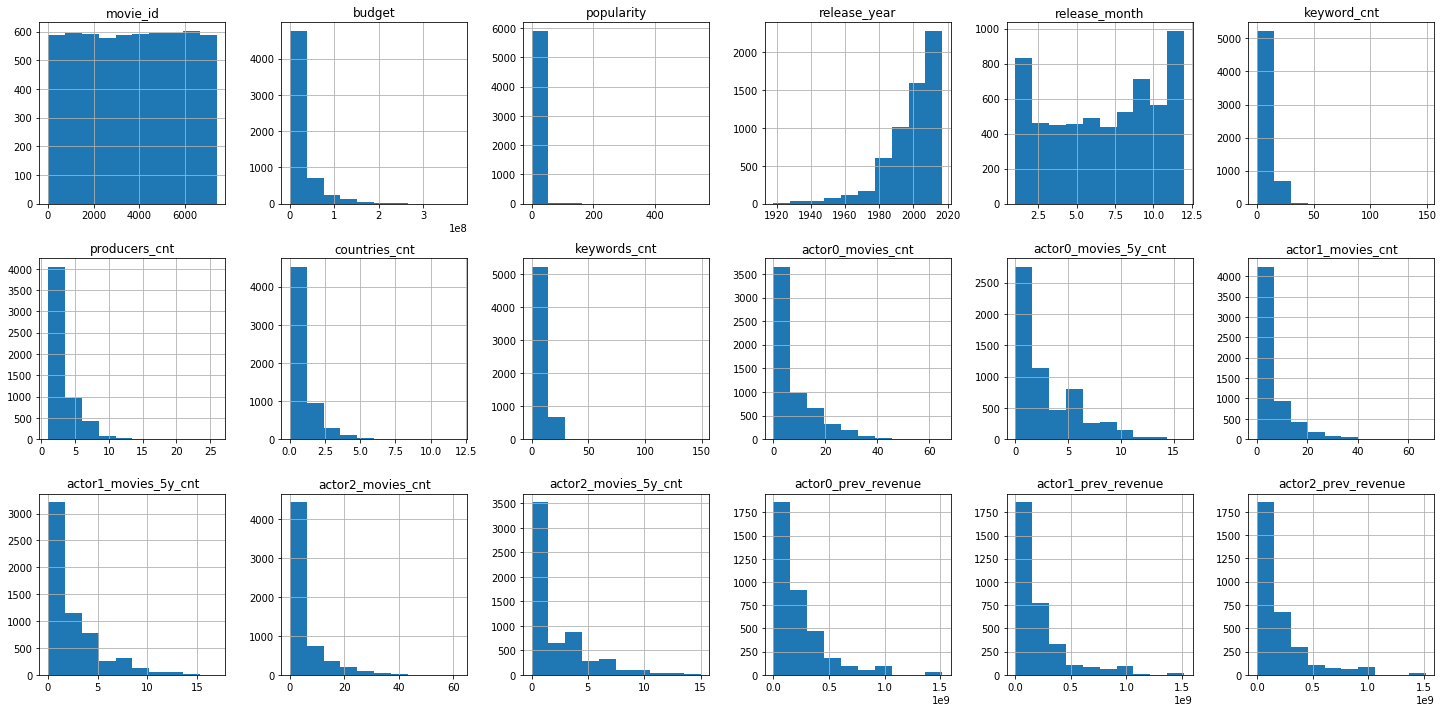

In [12]:

movies2.hist(layout=(6,6), figsize=(25,25))

plt.show()


['budget', 'popularity', 'release_year', 'release_month', 'keyword_cnt', 'producers_cnt', 'countries_cnt', 'keywords_cnt', 'actor0_movies_cnt', 'actor0_movies_5y_cnt', 'actor1_movies_cnt', 'actor1_movies_5y_cnt', 'actor2_movies_cnt', 'actor2_movies_5y_cnt', 'actor0_prev_revenue', 'actor1_prev_revenue', 'actor2_prev_revenue']


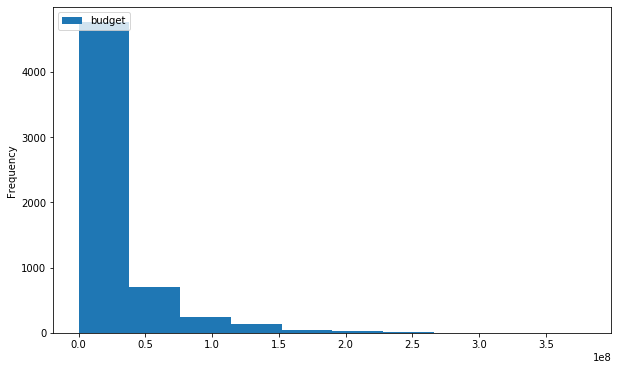

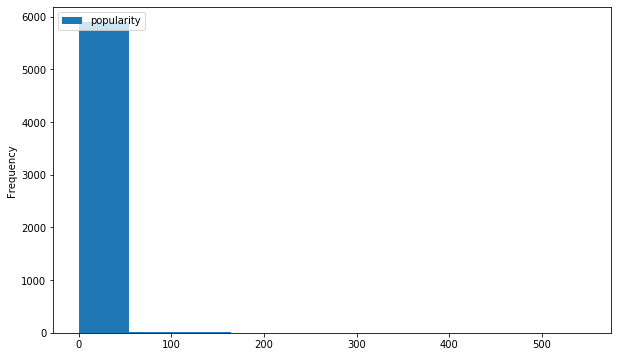

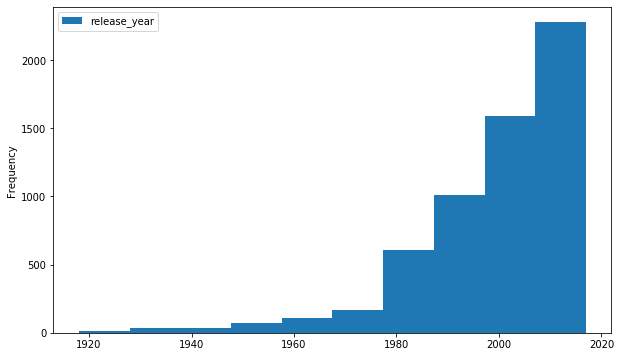

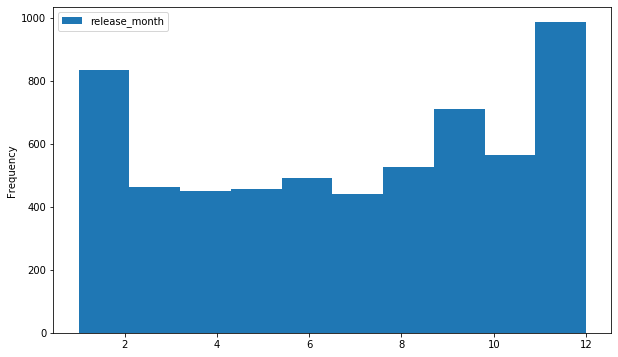

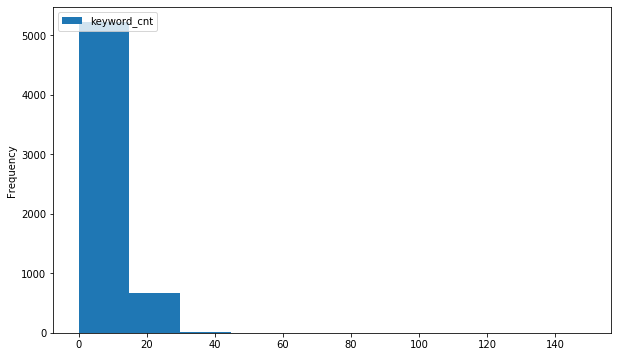

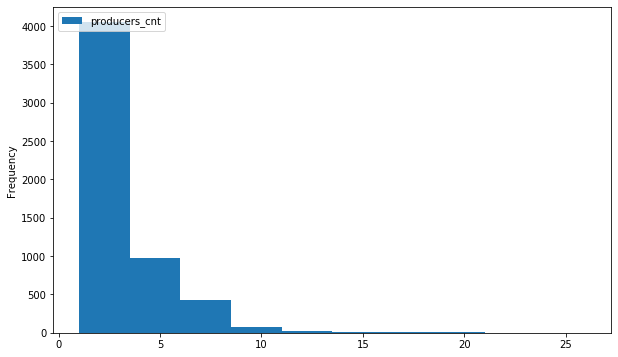

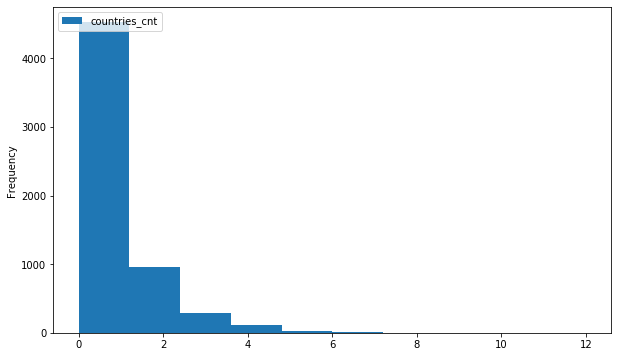

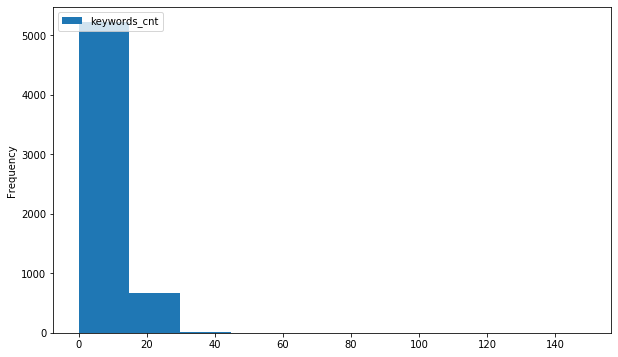

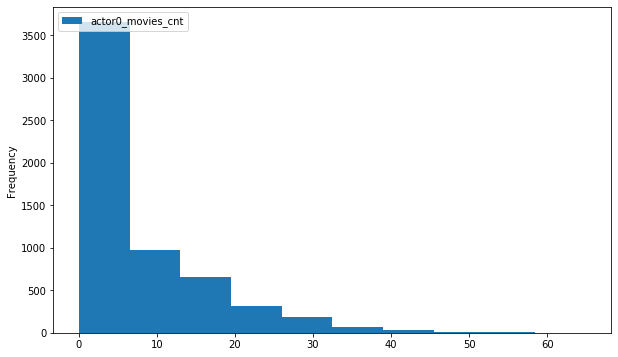

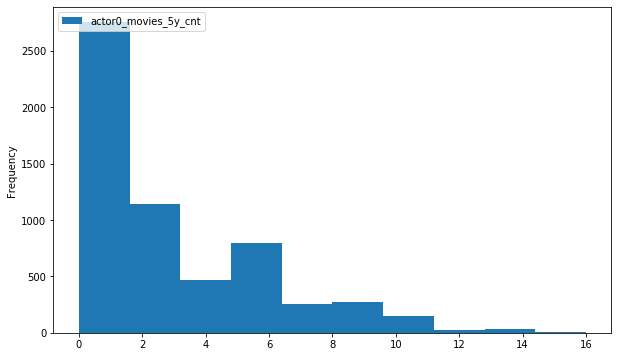

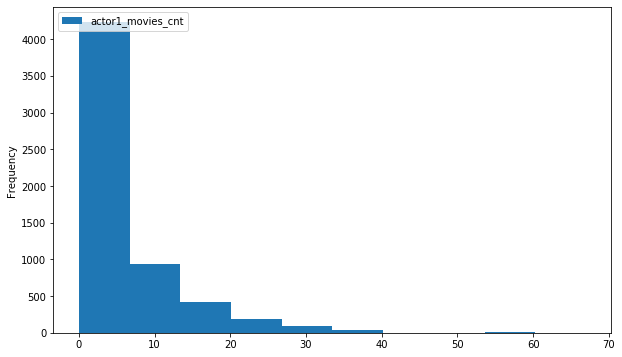

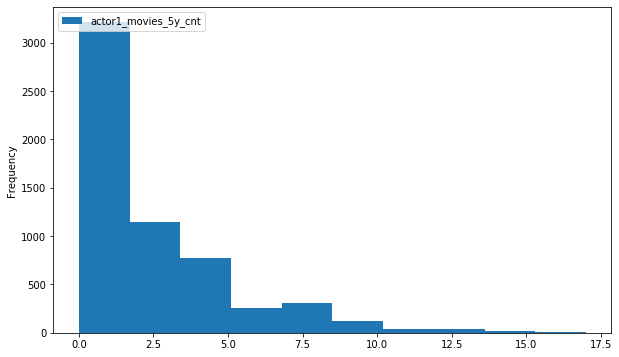

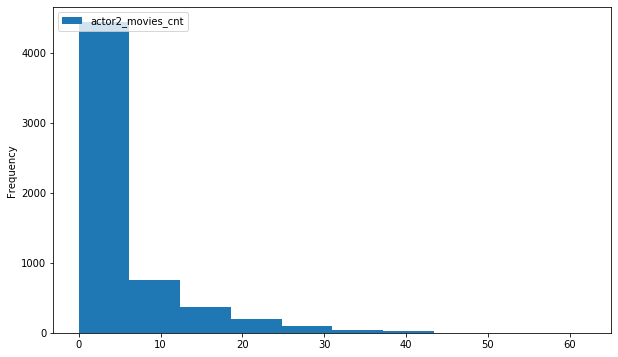

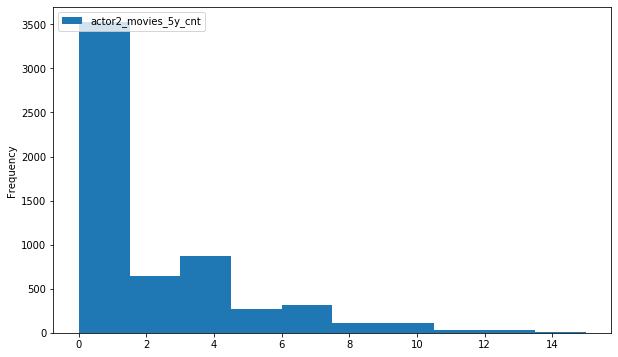

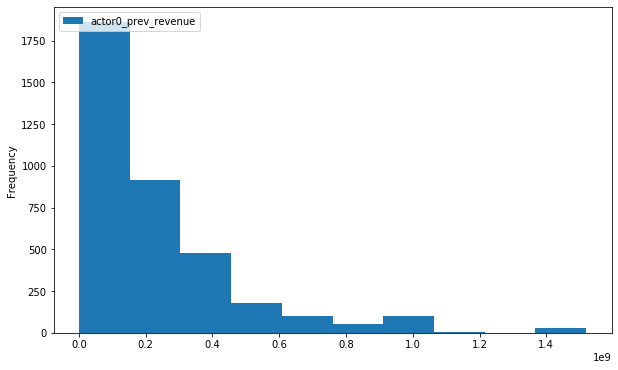

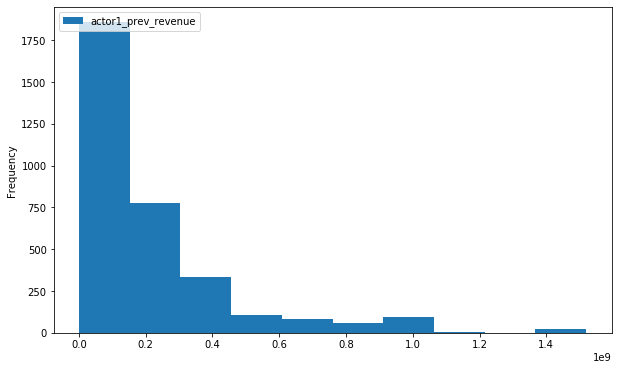

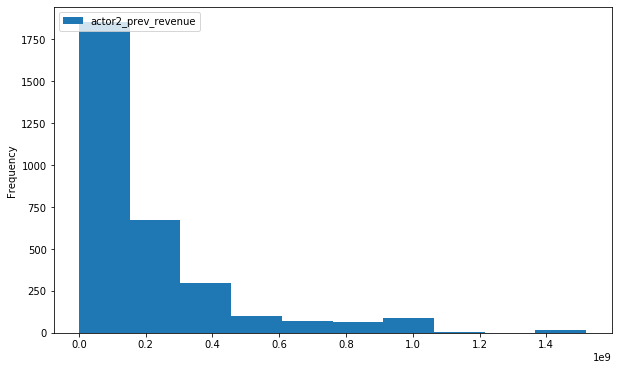

In [13]:
#  This is Just for me ......
movies3 =        movies2.loc[:, movies2.columns != 'movie_id']   
numeric_cols = movies3.select_dtypes(include=np.number).columns.tolist()
print(numeric_cols)

for column in movies3[numeric_cols]:
    
    movies3[column].plot(kind='hist' ) 
    plt.legend(loc='upper left')

    plt.show()


#  3

In [14]:
numeric_cols = movies3.select_dtypes(include=np.number).columns.tolist()

df_num = movies2[numeric_cols]
df_num["revenue"] = yData
df_corr = df_num.corr()
print(df_corr, "\n")


                        budget  popularity  release_year  release_month  \
budget                1.000000    0.336952      0.220146       0.045398   
popularity            0.336952    1.000000      0.101821       0.014291   
release_year          0.220146    0.101821      1.000000      -0.041533   
release_month         0.045398    0.014291     -0.041533       1.000000   
keyword_cnt           0.202506    0.174872     -0.096686       0.035817   
producers_cnt         0.179269    0.096629      0.298784       0.000584   
countries_cnt         0.100536    0.064182      0.129595       0.021581   
keywords_cnt          0.202506    0.174872     -0.096686       0.035817   
actor0_movies_cnt     0.330910    0.164766      0.299166       0.059985   
actor0_movies_5y_cnt  0.306147    0.149191      0.283721       0.040000   
actor1_movies_cnt     0.285138    0.135010      0.302086       0.056330   
actor1_movies_5y_cnt  0.289348    0.146647      0.292767       0.046151   
actor2_movies_cnt     0.2

C:\AnacondaDS\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 <a list of 18 Text xticklabel objects>)

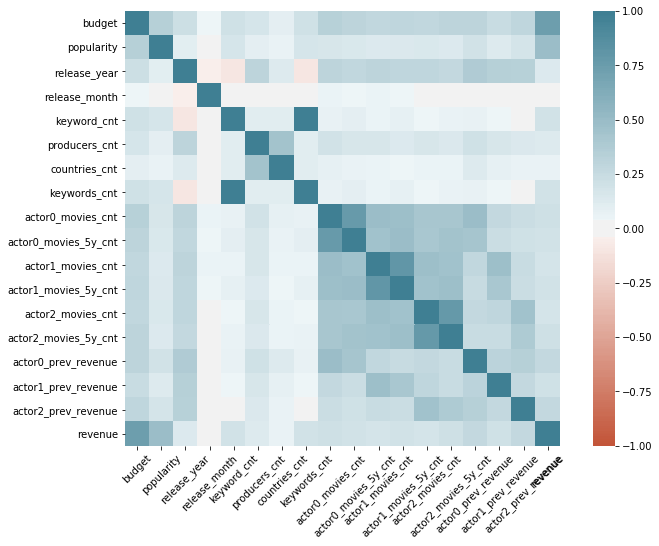

In [15]:
#  heatmap of correlation
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_corr, square=True, vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200))
plt.xticks(rotation=45)

In [32]:
from scipy import stats
# function which returns an array of the relevant  p_value
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

# movies3 =   exclude movie_id  col
numeric_cols = movies3.select_dtypes(include=np.number).columns.tolist()


movies4 = movies3[numeric_cols].copy()
movies4_fillna0s = movies4.fillna(0) #  no other choice ....
p_values = corr_sig(movies4_fillna0s)
#print(p_values)




In [33]:

def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=2, linecolor='black', cbar_kws={'orientation': 'horizontal'})



In [34]:
### import numpy as np
# בחרתי לבדוק הקורלציה על כל הנתונים שיבאתי  מה  flate file
df_corr = movies.corr()


indices = np.where(df_corr > 0.46)
indices = [(movies.columns[x], df_corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices


[('revenue', 'budget'),
 ('revenue', 'popularity'),
 ('release_year', 'keywords_cnt'),
 ('lang_FR', 'actor0_movies_5y_cnt'),
 ('lang_FR', 'actor1_movies_cnt'),
 ('lang_FR', 'actor1_movies_5y_cnt'),
 ('lang_FR', 'actor0_prev_revenue'),
 ('lang_RU', 'actor1_movies_5y_cnt'),
 ('lang_ES', 'actor1_movies_5y_cnt'),
 ('lang_ES', 'actor2_movies_cnt'),
 ('lang_ES', 'actor1_prev_revenue'),
 ('lang_JA', 'actor2_movies_5y_cnt'),
 ('keywords_cnt', 'actor2_movies_5y_cnt'),
 ('keywords_cnt', 'actor2_prev_revenue')]

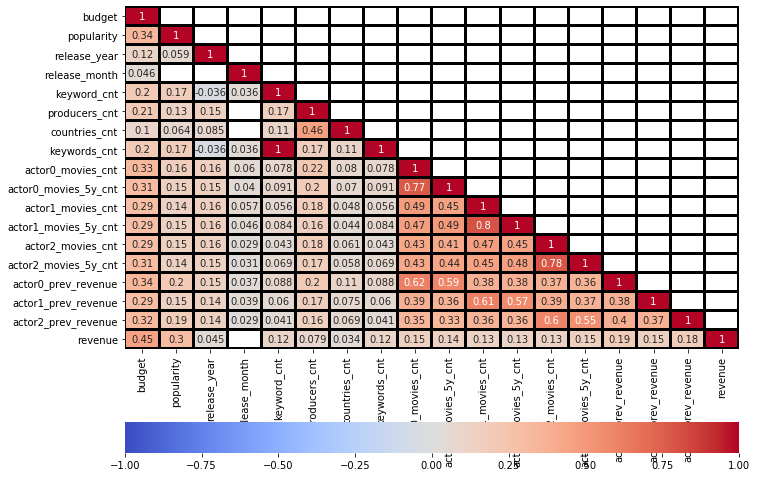

In [35]:
# Plotting with significance filter
yData_fillna0 = yData.fillna(0)
movies4_fillna0s["revenue"] = yData_fillna0
corr = movies4_fillna0s.corr()                            # get correlation
p_values = corr_sig(movies4_fillna0s)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)  


#  4
4.	תתארו את משתנה המטרה (revenue) - איך הוא מתפלג? האם יש קטגוריות שמראים שוני גדול התפלגות של משתנה המטרה?

C:\AnacondaDS\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\AnacondaDS\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


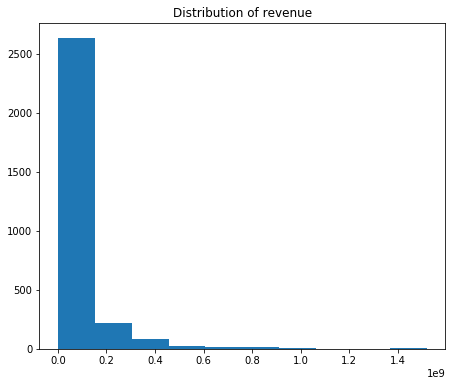

In [36]:
fig, ax = plt.subplots(figsize = (16, 6))
y = yData
plt.subplot(1, 2, 1)
plt.hist(y);
plt.title('Distribution of revenue');


התפלגות של משתנה המטרה לא נורמלית. בעלת פיק גבוה  וסטייה לכיוון יחיד  - univariate 

יש לו הרבה מאוד ערכים מרוחקים ולכן בכדי שנוכל להכיל חלק רב מהנקודות המרוחקות יש להשתמש בלוג .

Text(0.5, 1.0, 'Distribution of log of revenue')

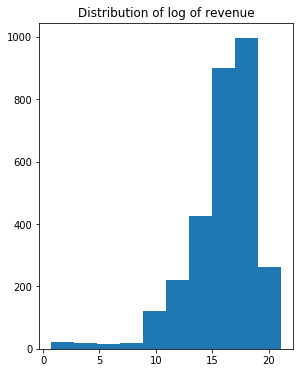

In [37]:
plt.subplot(1, 2, 2)
plt.hist(np.log1p(y));
plt.title('Distribution of log of revenue')

למשתנה המטרה יש קורלצייה טובה עם העמודות :
    budget
    popularity
    actor2_prev_revenue
    
     לגבי המשתנים הקטגוריים אבדוק בהמשך ...
    chi square  עם

In [38]:
def missing_values_table(df): 
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    return mis_val_table_ren_columns


In [24]:
#  חסרים למשתנה המטרה כמחצית מהנתונים  --  אולי כי סיכויי ההצלחה הם 50 : 50  ?
#  כלומר סרטים שנכשלו קבלו הערך NA
df =missing_values_table(yData)
df

TypeError: cannot concatenate object of type '<class 'numpy.int64'>'; only Series and DataFrame objs are valid

In [39]:
y = yData

Text(0.5, 1.0, 'Distribution of log of revenue')

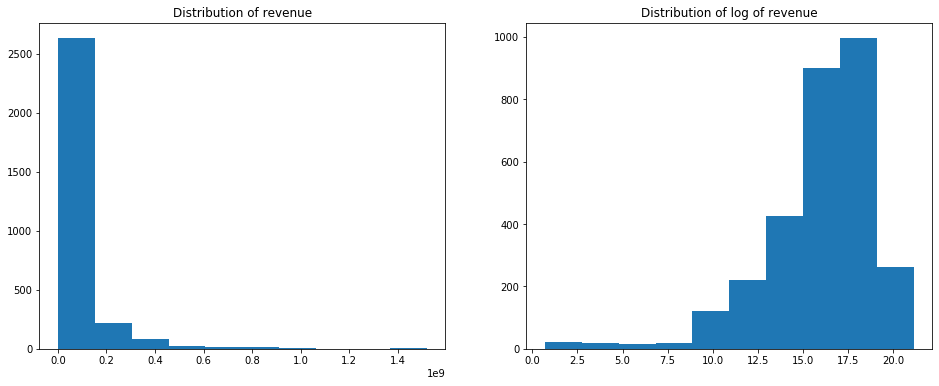

In [40]:
#PART 3
#outliers
fig, ax = plt.subplots(figsize = (16, 6))
y = yData
plt.subplot(1, 2, 1)
plt.hist(y);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(y));
plt.title('Distribution of log of revenue')

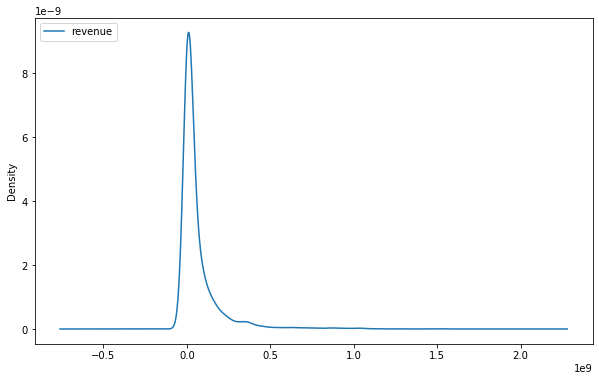

In [41]:
yData.plot(kind='kde' ) 
plt.legend(loc='upper left')

plt.show()


#  5
5.	תייצרו גרפים שיכולים לעזור לכם לבדוק האם קיימים נתוני קיצון. תתארו אותם. 

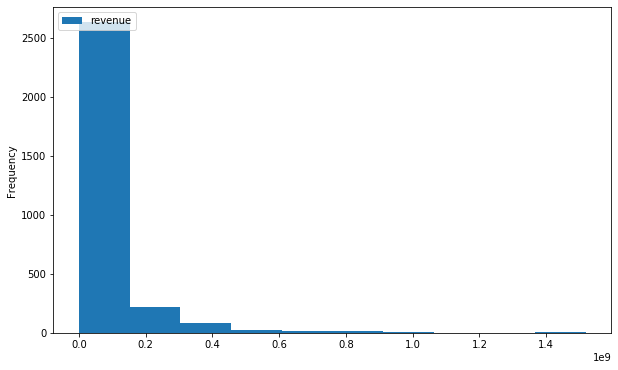

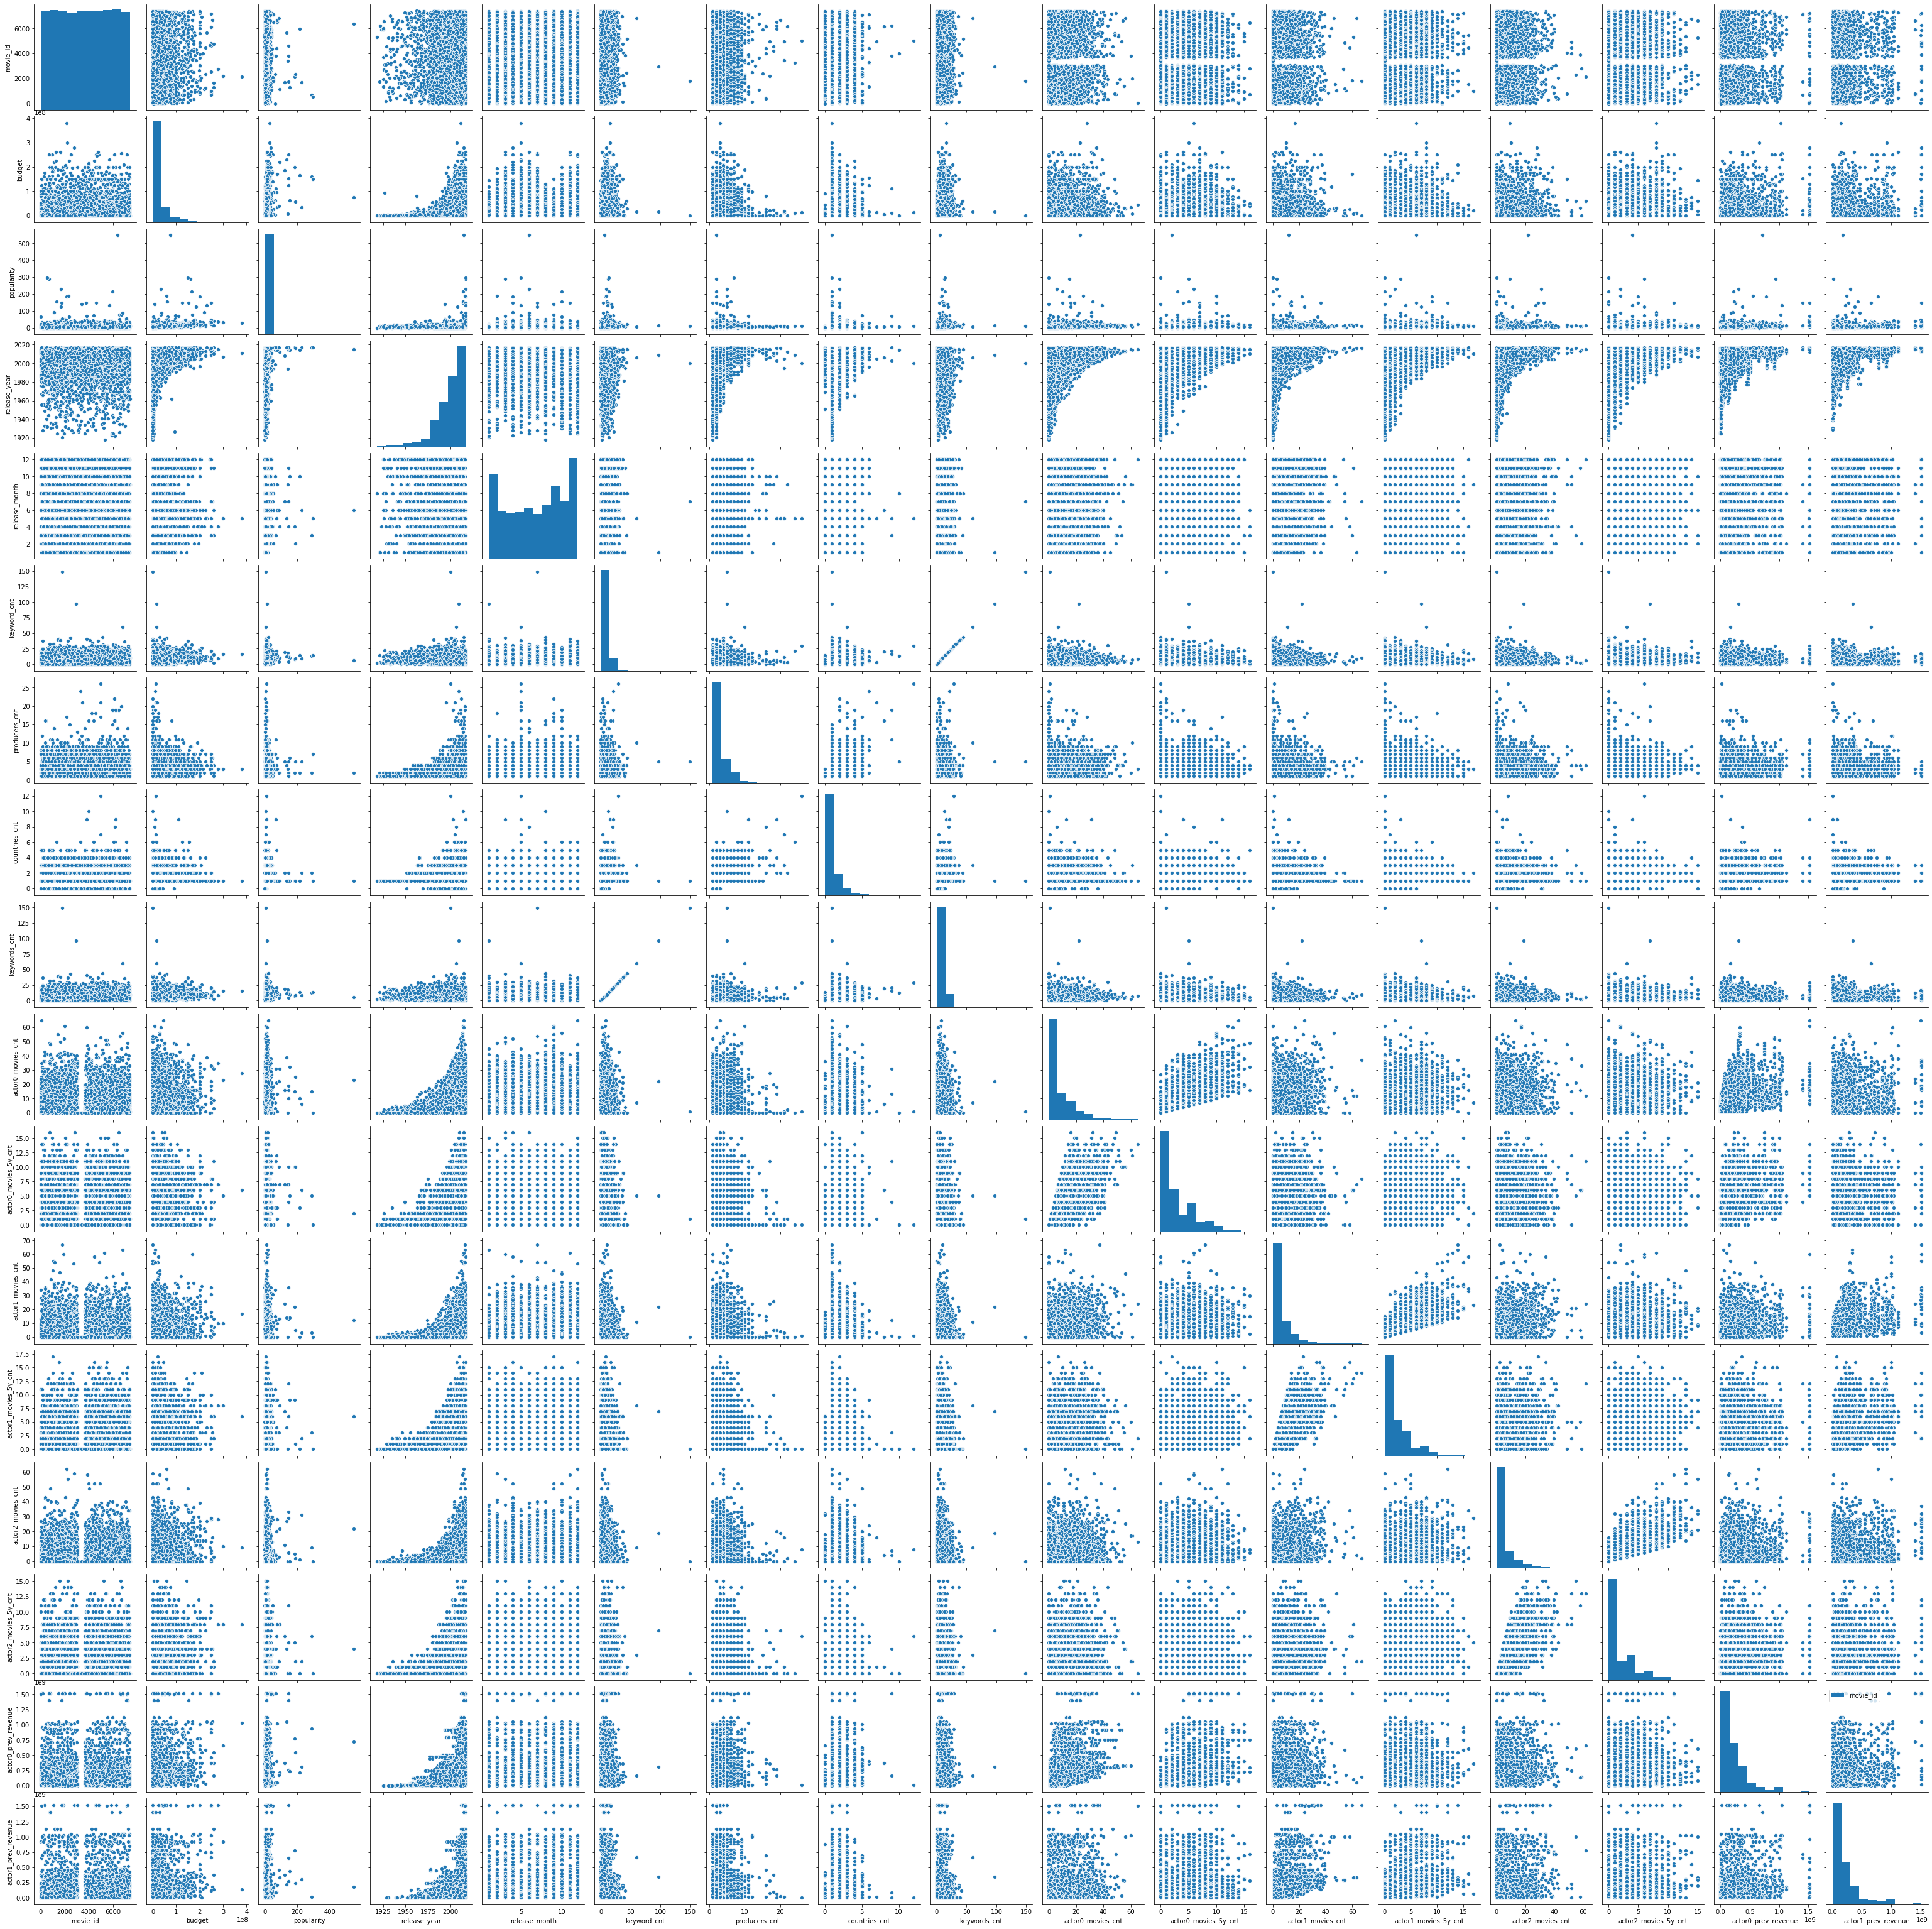

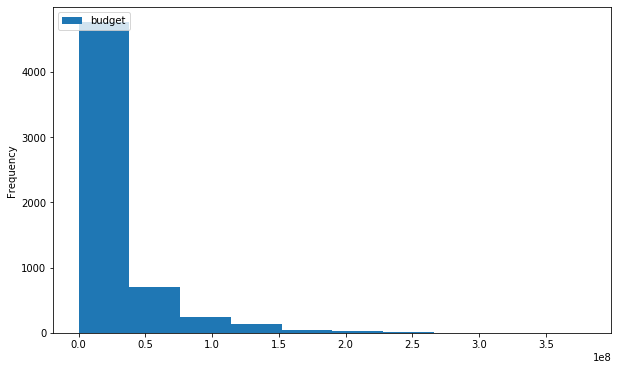

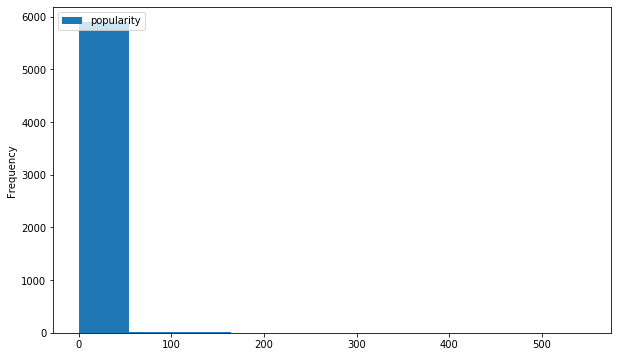

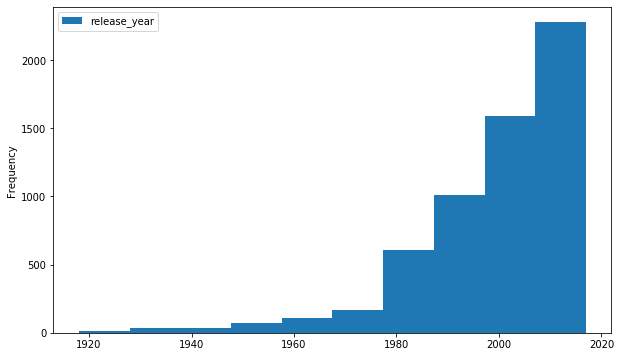

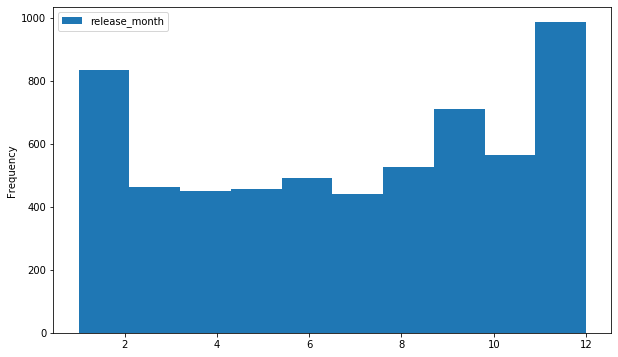

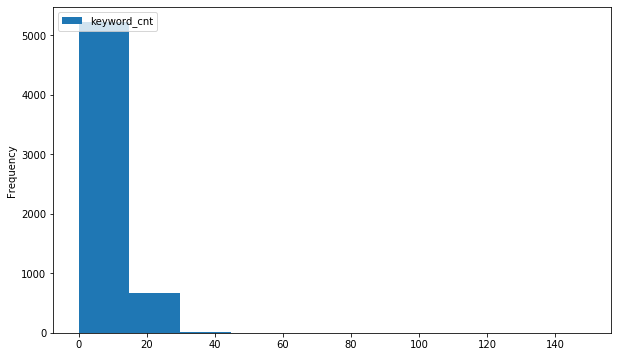

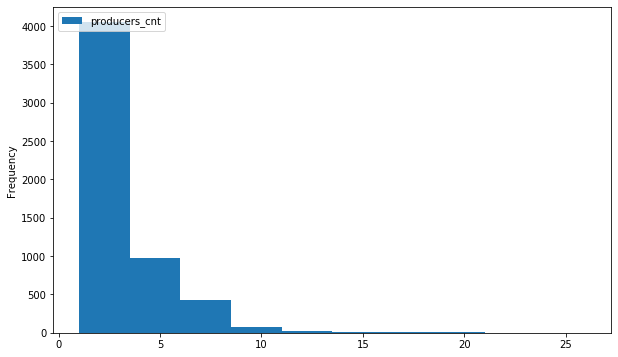

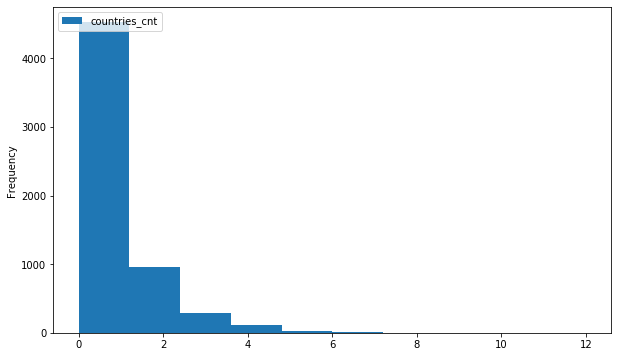

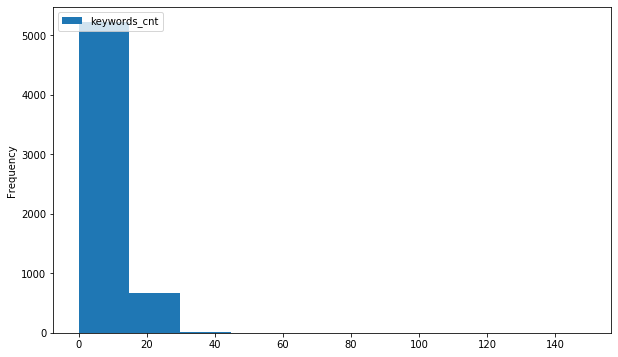

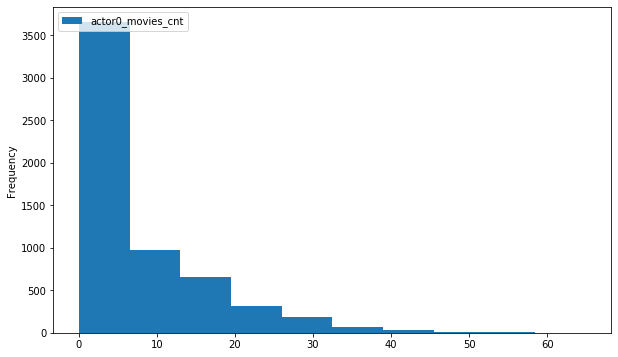

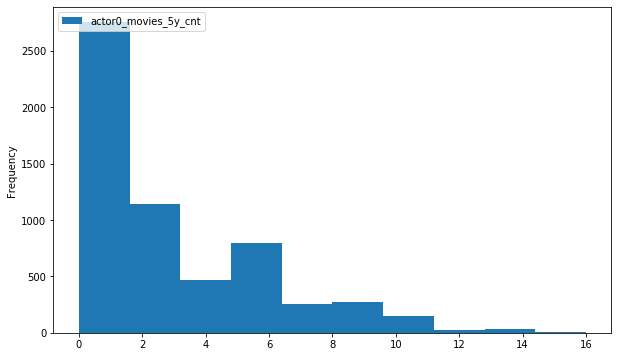

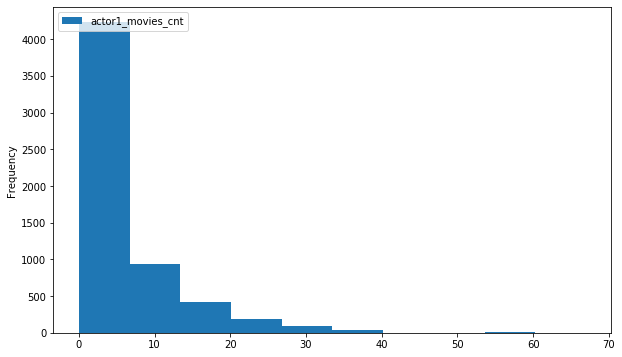

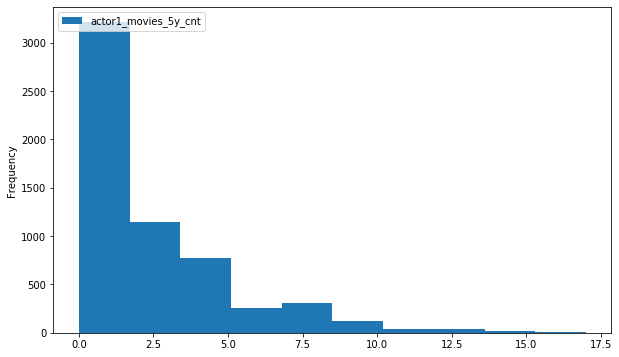

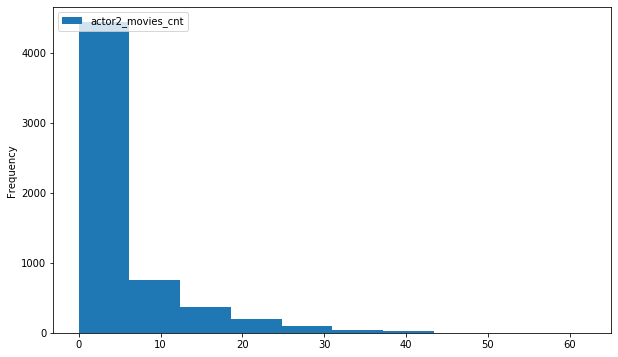

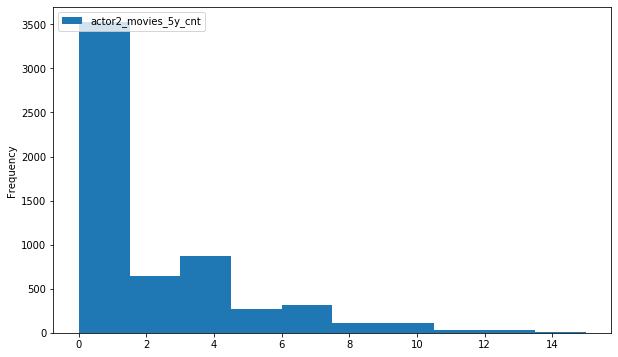

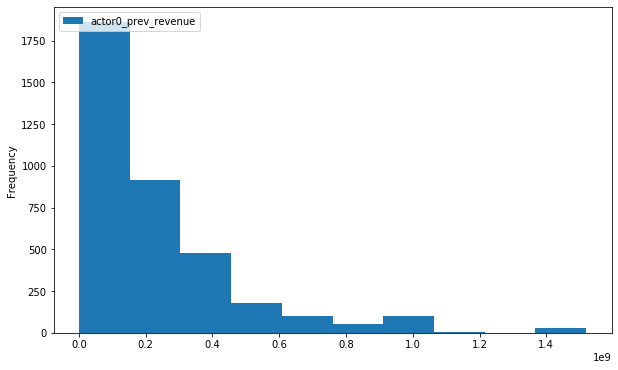

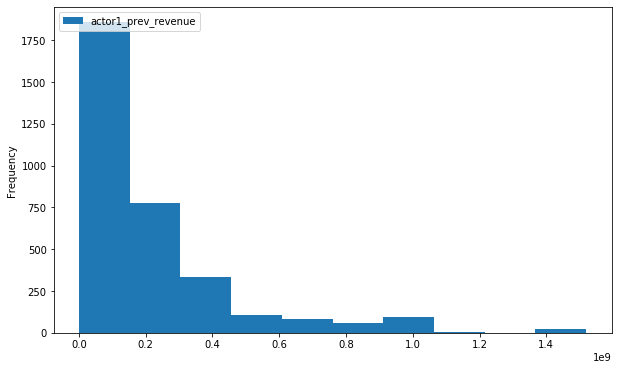

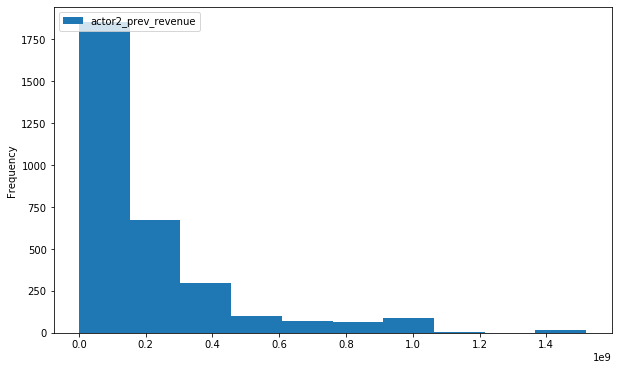

In [45]:
# shows outliers  -   5 



yData.plot(kind='hist' ) 
plt.legend(loc='upper left')
plt.show()


# the numeric columns
numeric_cols = movies2.select_dtypes(include=np.number).columns.tolist()

#pairplot of  z numeric columns
sns.pairplot(movies2, vars=numeric_cols[:len(numeric_cols) - 1], palette='Set3')
for column in movies2[numeric_cols]:
    
    movies2[column].plot(kind='hist' ) 
    plt.legend(loc='upper left')

    plt.show()



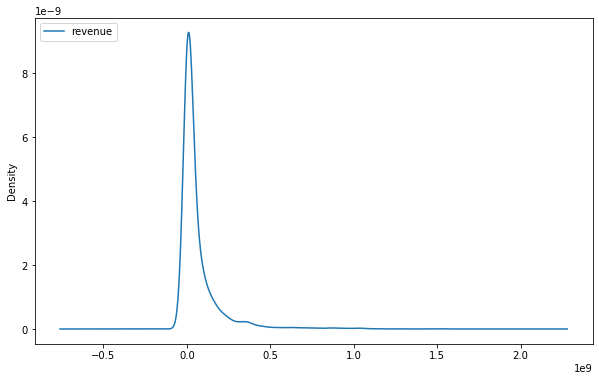

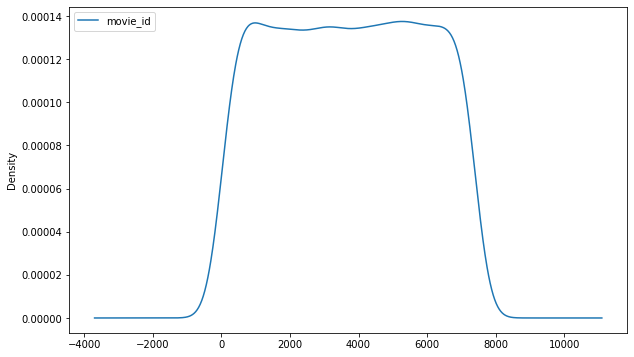

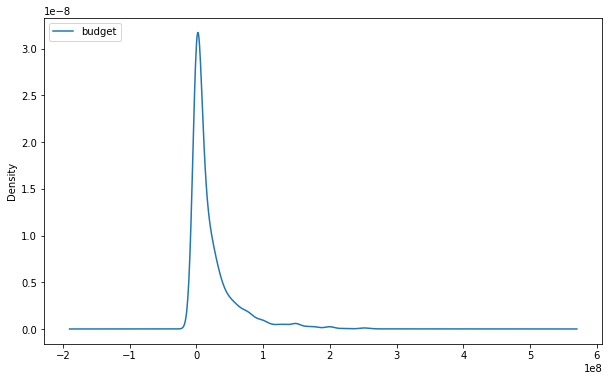

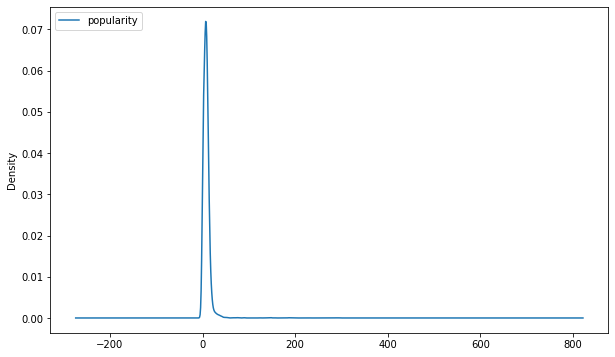

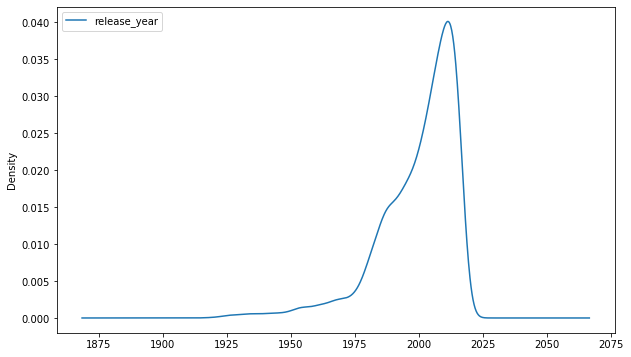

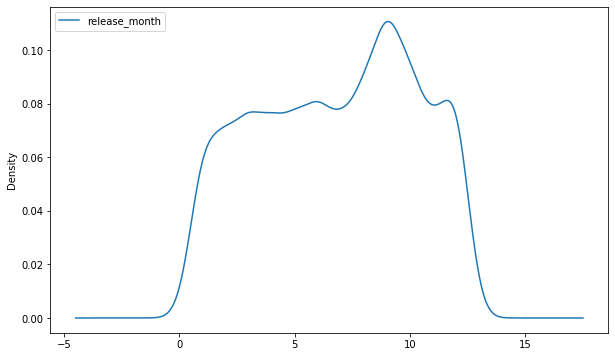

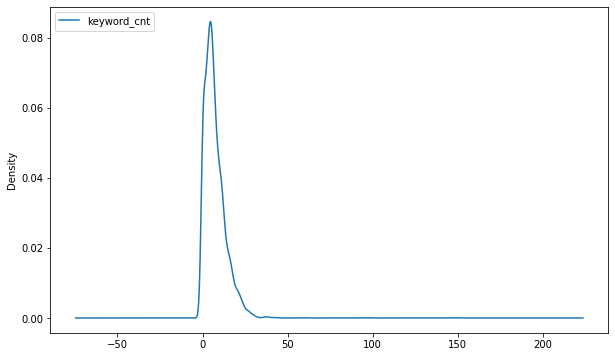

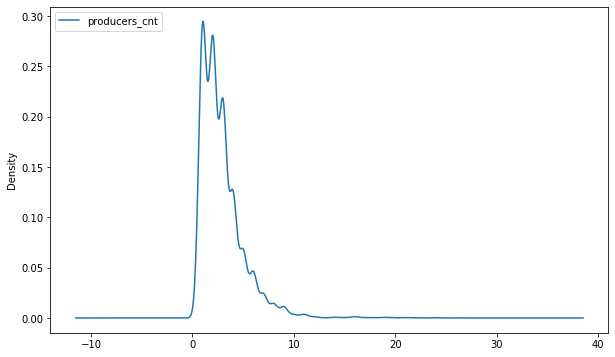

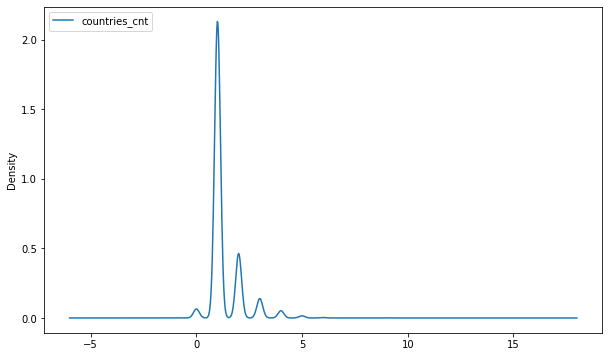

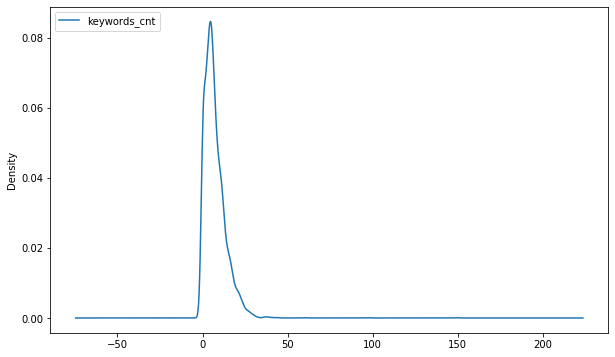

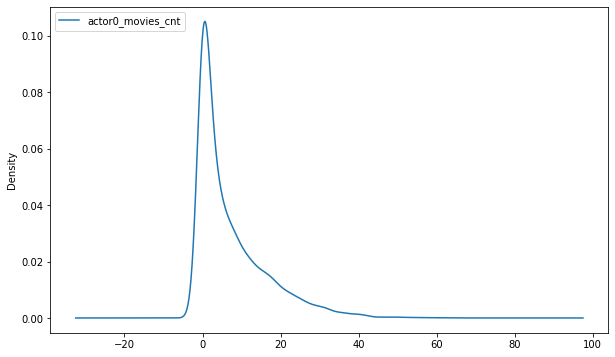

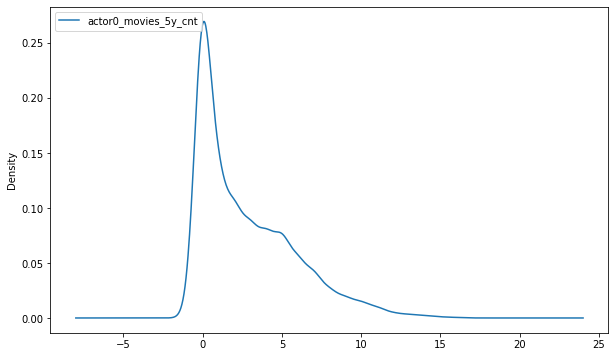

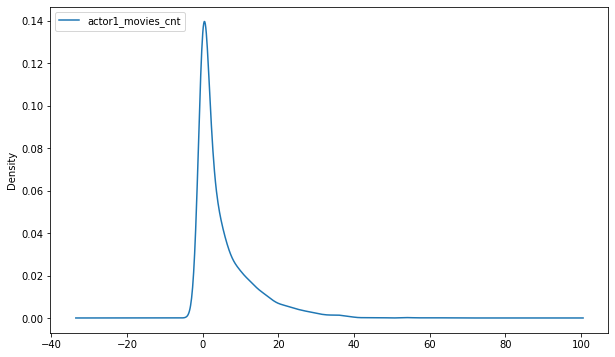

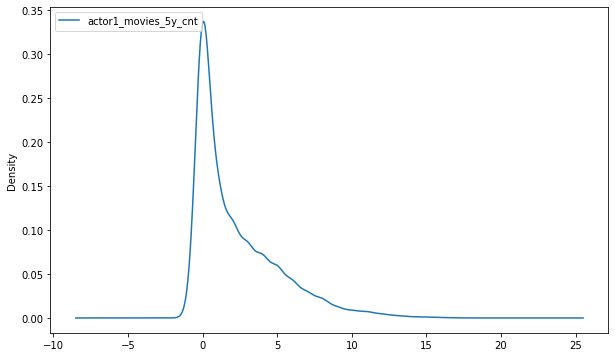

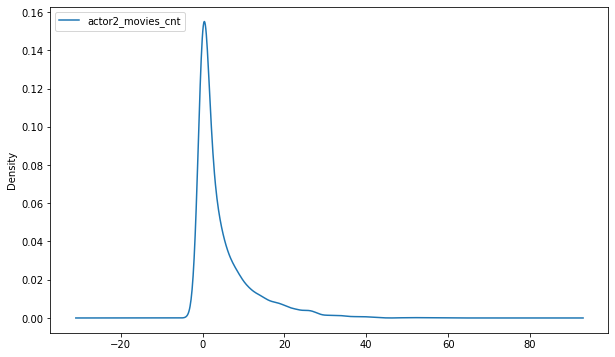

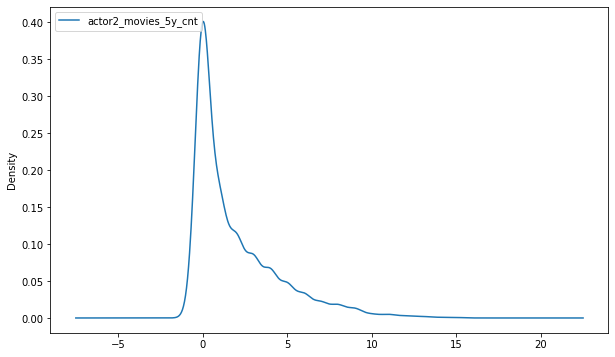

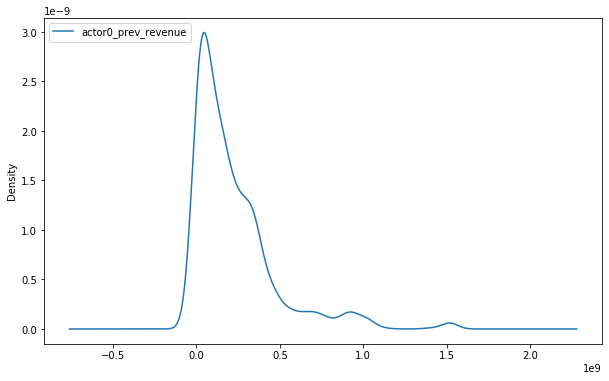

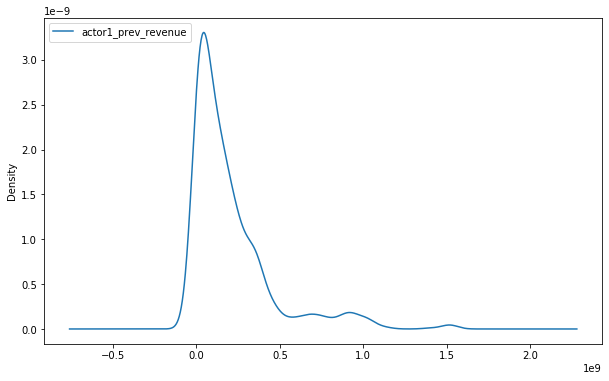

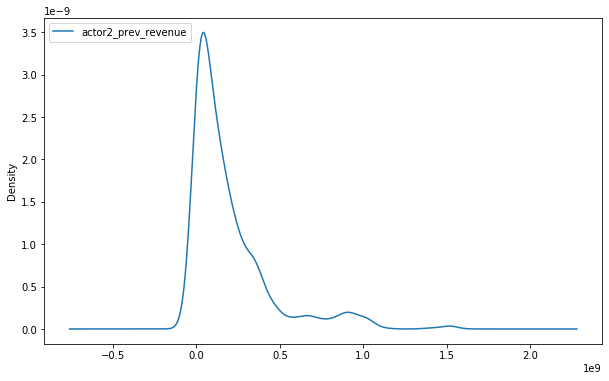

In [47]:
yData.plot(kind='kde' ) 
plt.legend(loc='upper left')
plt.show()

numeric_cols = movies2.select_dtypes(include=np.number).columns.tolist()


for column in movies2[numeric_cols]:
    
    movies2[column].plot(kind='kde' ) 
    plt.legend(loc='upper left')

    plt.show()


#  6
6.	תתארו את הנתונים החסרים: אצל איזה משתנים יש נתונים חסרים? כמה?

column budget     2023 zeroes . 2023  missing values .  

In [48]:
movies2.set_index(['movie_id'],inplace=True)

arr =  movies2.isnull().sum()

arr

budget                     0
original_language          0
popularity                 0
release_date               1
release_year               1
release_month              1
seasonality                0
runtime_cat                0
status                     2
keyword_cnt                0
sw_collection              0
producers_cnt            343
countries_cnt              0
lang_US                    0
lang_FR                    0
lang_RU                    0
lang_ES                    0
lang_JA                    0
keywords_cnt               0
actor0_movies_cnt          0
actor0_movies_5y_cnt       0
actor1_movies_cnt          0
actor1_movies_5y_cnt       0
actor2_movies_cnt          0
actor2_movies_5y_cnt       0
sw_female_actor0         742
sw_female_actor1         629
sw_female_actor2         642
sw_male_actor0           742
sw_male_actor1           629
sw_male_actor2           642
actor0_prev_revenue     2212
actor1_prev_revenue     2581
actor2_prev_revenue     2749
dtype: int64

9 העמודות התחתונות מכילות נתונים חסרים כי הן מסתמכות על עמודת ה   revenue

חוץ מזה לעמודת התקציב ג"כ חסרים 25 אחוז מהנתונים . כל הערכים המאופסים הם NULL

#  7
7.	תייצרו מטריצה של חסרים (תייצרו dataframe עם אותם מימדים מטבלת המקור ותאים שיש חסרים תשימו ערך של אחד ובאלה שיש נתונים ערך אפס). תציגו את המטריצה בגרף heatmap.

In [49]:
def MissingMatrix(df=None):
    missingarr = df.isnull().sum()
    missingarr = missingarr.tolist()
    for (i, item) in enumerate(missingarr):
        if item > 0:
            missingarr[i] = 1
    

    matrixlen = len(missingarr)
    p_matrix= np.zeros(shape=(matrixlen,matrixlen))

    for col in  range(matrixlen ) :
        for col2 in range (matrixlen ) :
            val = (  0, 1) [ missingarr[col] > 0  or  missingarr[col2] > 0 ]
            p_matrix[col2,col] = val
    return p_matrix


In [50]:
import numpy  as np
import pandas as pd

numeric_cols = movies2.select_dtypes(include=np.number).columns.tolist()
data = movies2[numeric_cols].copy()

arr = MissingMatrix(data )

df = pd.DataFrame()
numpy_data = np.array(arr)
dfmissingvalues = pd.DataFrame(data=numpy_data,  columns=numeric_cols)



dfmissingvalues

budget  popularity  release_year  release_month  keyword_cnt  \
0      0.0         0.0           1.0            1.0          0.0   
1      0.0         0.0           1.0            1.0          0.0   
2      1.0         1.0           1.0            1.0          1.0   
3      1.0         1.0           1.0            1.0          1.0   
4      0.0         0.0           1.0            1.0          0.0   
5      1.0         1.0           1.0            1.0          1.0   
6      0.0         0.0           1.0            1.0          0.0   
7      0.0         0.0           1.0            1.0          0.0   
8      0.0         0.0           1.0            1.0          0.0   
9      0.0         0.0           1.0            1.0          0.0   
10     0.0         0.0           1.0            1.0          0.0   
11     0.0         0.0           1.0            1.0          0.0   
12     0.0         0.0           1.0            1.0          0.0   
13     0.0         0.0           1.0            1.0          0.0   
14     1.0         1.0           1.0            1.0          1.0   
15     1.0         1.0           1.0            1.0          1.0   
16     1.0         1.0           1.0            1.0          1.0   

    producers_cnt  countries_cnt  keywords_cnt  actor0_movies_cnt  \
0             1.0            0.0           0.0                0.0   
1             1.0            0.0           0.0                0.0   
2             1.0            1.0           1.0                1.0   
3             1.0            1.0           1.0                1.0   
4             1.0            0.0           0.0                0.0   
5             1.0            1.0           1.0                1.0   
6             1.0            0.0           0.0                0.0   
7             1.0            0.0           0.0                0.0   
8             1.0            0.0           0.0                0.0   
9             1.0            0.0           0.0                0.0   
10            1.0            0.0           0.0                0.0   
11            1.0            0.0           0.0                0.0   
12            1.0            0.0           0.0                0.0   
13            1.0            0.0           0.0                0.0   
14            1.0            1.0           1.0                1.0   
15            1.0            1.0           1.0                1.0   
16            1.0            1.0           1.0                1.0   

    actor0_movies_5y_cnt  actor1_movies_cnt  actor1_movies_5y_cnt  \
0                    0.0                0.0                   0.0   
1                    0.0                0.0                   0.0   
2                    1.0                1.0                   1.0   
3                    1.0                1.0                   1.0   
4                    0.0                0.0                   0.0   
5                    1.0                1.0                   1.0   
6                    0.0                0.0                   0.0   
7                    0.0                0.0                   0.0   
8                    0.0                0.0                   0.0   
9                    0.0                0.0                   0.0   
10                   0.0                0.0                   0.0   
11                   0.0                0.0                   0.0   
12                   0.0                0.0                   0.0   
13                   0.0                0.0                   0.0   
14                   1.0                1.0                   1.0   
15                   1.0                1.0                   1.0   
16                   1.0                1.0                   1.0   

    actor2_movies_cnt  actor2_movies_5y_cnt  actor0_prev_revenue  \
0                 0.0                   0.0                  1.0   
1                 0.0                   0.0                  1.0   
2                 1.0                   1.0                  1.0   
3                 1.0

In [51]:
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time

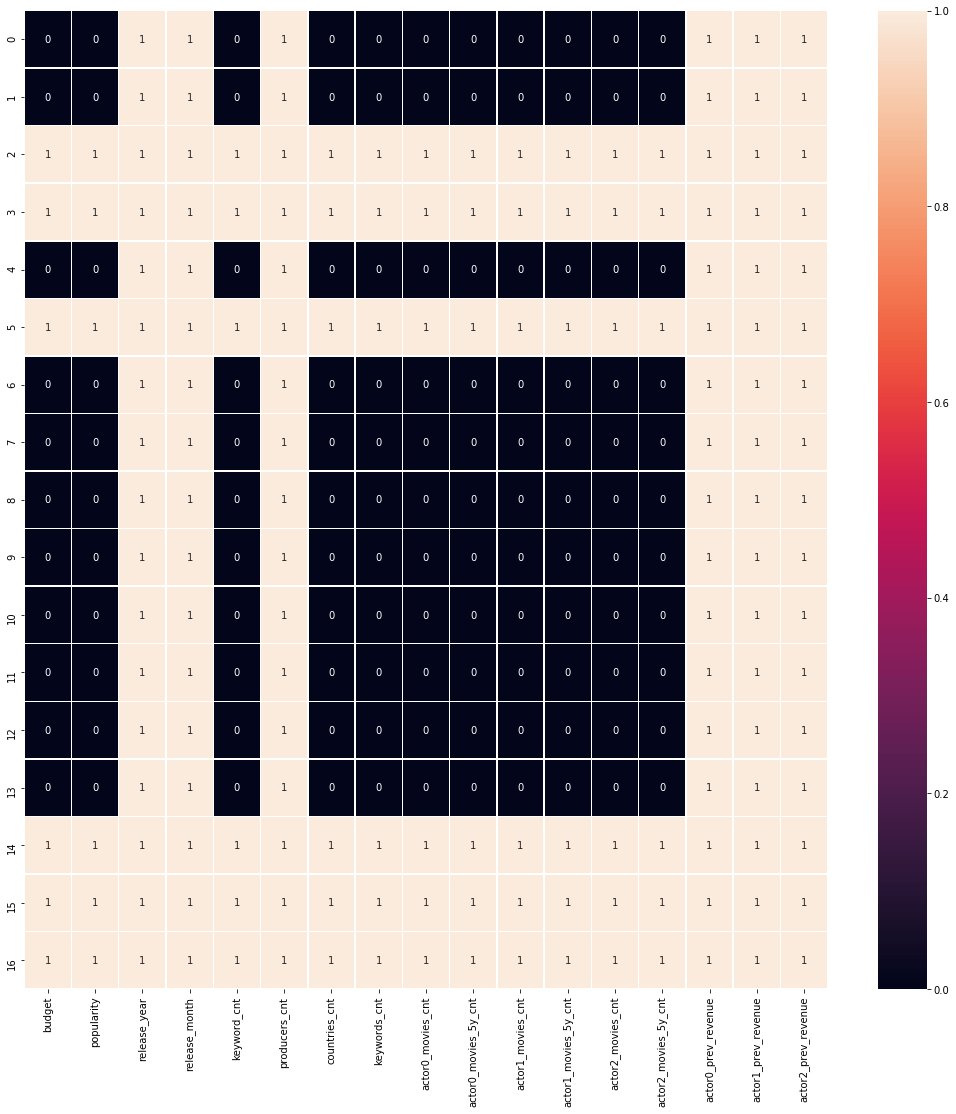

In [52]:

#missing  values matrix
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(dfmissingvalues, annot=True, linewidths=.5, fmt= '.0f',ax=ax);

#  Part 3  cleaning data

#  outliers

# 1  +  2  + 4
1.	במשתנים שבהם מוצאים ערכי קיצון תבדקו את ההתפלגות של המשתנה עם ובלי ערכי הקיצון. האם ההתפלגות משתנה ? 


#
1.	במשתנים שבהם מוצאים ערכי קיצון תבדקו את ההתפלגות של המשתנה עם ובלי ערכי הקיצון. האם ההתפלגות משתנה ? 
2.	תייצרו גרף scatter עם המשתנים שבשאלה הקודמת ב-X ומשתנה המטרה ב-Y. האם ערכי קיצון במשתנה ה-X משפיעה על ההתנהגות של משתנה ה-Y? האם רואים שוני עם או בלי ערכי הקיצון?
3.	באיזה משתנים הייתם מוחקים את ערכי הקיצון? איך הייתם מוחקים אותם? נמקו.
BUDGET
REVENUE
יש ערכים מתחת ל 10  ואפילו מדובר במליונים זה סכום מאוד זניח 


4.	תפעלו על הנתונים לפי מה שהגדרתם בשאלה הקודמת.



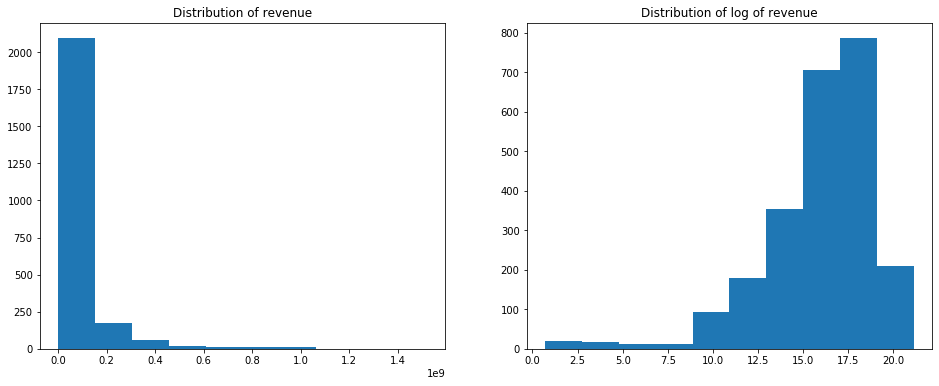

In [59]:
movies2["revenue"] = yData
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(movies2['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(movies2['revenue']));
plt.title('Distribution of log of revenue');

In [60]:
# the log revenue is normalized .  Z Score
movies2['log_revenue'] = np.log1p(movies2['revenue'])

MemoryError: Unable to allocate 113. GiB for an array with shape (15195579090,) and data type float64

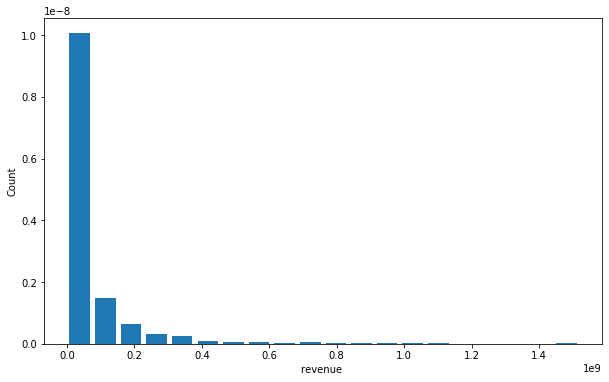

In [61]:
from scipy.stats import norm
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

plt.hist(movies2.revenue, bins=20, rwidth=0.8, density=True)
plt.xlabel('revenue ')
plt.ylabel('Count')

rng = np.arange(movies2.revenue.min(), movies2.revenue.max(), 0.1)
plt.plot(rng, norm.pdf(rng,movies2.revenue.mean(),movies2.revenue.std()))


In [71]:
movies2['orig_lang2'] = [x  if x  in [ "en","fr","in","ru","es","ja" ]  else 'other' for x in movies2['original_language']]

In [95]:
df['zscore'] = ( movies2.revenue - movies2.revenue.mean() ) / movies2.revenue.std()
df_no_outliers_z = movies2[(df.zscore>-3) & (df.zscore<3)]

df_no_outliers_z


budget original_language  popularity release_date  release_year  \
movie_id                                                                       
2825              0                en    5.831622   1994-11-18        1994.0   
1400       50000000                en   16.075615   2016-05-15        2016.0   
692        35000000                en    5.370818   2003-09-05        2003.0   
777       130000000                en    9.566135   2008-11-18        2008.0   
2767       25000000                en    8.925600   2000-12-14        2000.0   
...             ...               ...         ...          ...           ...   
1908       48000000                en    6.744680   2010-01-14        2010.0   
1842       15000000                en    9.747452   2009-08-21        2009.0   
1913              0                es    7.131568   2010-10-20        2010.0   
904               0                en    1.833948   1984-03-16        1984.0   
662         5500000                da    4.711231   2012-09-04        2012.0   

          release_month seasonality runtime_cat    status  keyword_cnt  ...  \
movie_id                                                                ...   
2825               11.0        fall         med  Released            8  ...   
1400                5.0      spring         med  Released           12  ...   
692                 9.0        fall         med  Released           15  ...   
777                11.0        fall        long  Released           11  ...   
2767               12.0      winter        long  Released            5  ...   
...                 ...         ...         ...       ...          ...  ...   
1908                1.0      winter         med  Released            6  ...   
1842                8.0      summer         med  Released            5  ...   
1913               10.0        fall        long  Released            4  ...   
904                 3.0      spring         med  Released            5  ...   
662                 9.0        fall         med  Released            9  ...   

         sw_male_actor0  sw_male_actor1  sw_male_actor2 actor0_prev_revenue  \
movie_id                                                                      
2825                1.0             0.0             1.0         920100000.0   
1400                1.0             1.0             0.0         662845518.0   
692                 1.0             0.0             1.0         117487473.0   
777                 0.0             1.0             0.0         384335608.0   
2767                0.0             1.0             1.0          15000000.0   
...                 ...             ...             ...                 ...   
1908                1.0             1.0             0.0         230685453.0   
1842                0.0             1.0             1.0         158733820.0   
1913                1.0             0.0             0.0         217764291.0   
904                 1.0             0.0             1.0                 NaN   
662                 1.0             0.0             0.0         431971116.0   

         actor1_prev_revenue actor2_prev_revenue      revenue log_revenue  \
movie_id                                                                    
2825               9518342.0         176997168.0  100000000.0   18.420681   
1400             142851197.0                 NaN  346864462.0   19.664445   
692              117487473.0                 NaN  180622424.0   19.011919   
777              459359555.0         144000000.0  331957105.0   19.620516   
2767             113374103.0          41954997.0  136150434.0   18.729271   
...                      ...                 ...          ...         ...   
1908              33000000.0         177841558.0  152427960.0   18.842203   
1842                     NaN                 NaN   27900000.0   17.144137   
1913                     NaN                 NaN    1548955.0   14.253092   
904               10400000.0          33697647.0  202026112.0   19.12

MemoryError: Unable to allocate 3.51 GiB for an array with shape (471222888,) and data type float64

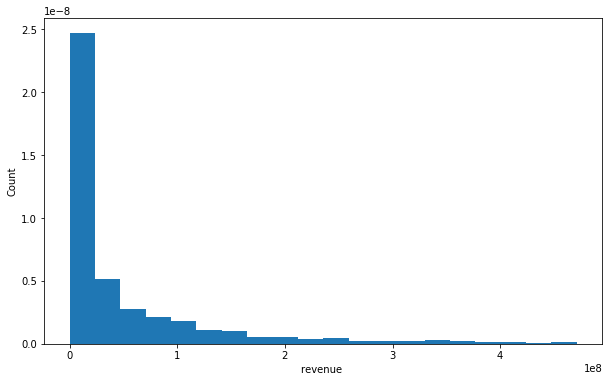

In [96]:
#  after remove the outliers  of revenue
from scipy.stats import norm
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)


plt.hist(df_no_outliers_z.revenue, bins=20, rwidth=1.0, density=True)
plt.xlabel('revenue ')
plt.ylabel('Count')

rng = np.arange(df_no_outliers_z.revenue.min(), df_no_outliers_z.revenue.max()  )  #, 0.1)
plt.plot(rng, norm.pdf(rng,df_no_outliers_z.revenue.mean(),df_no_outliers_z.revenue.std()))


<Figure size 1080x1080 with 0 Axes>

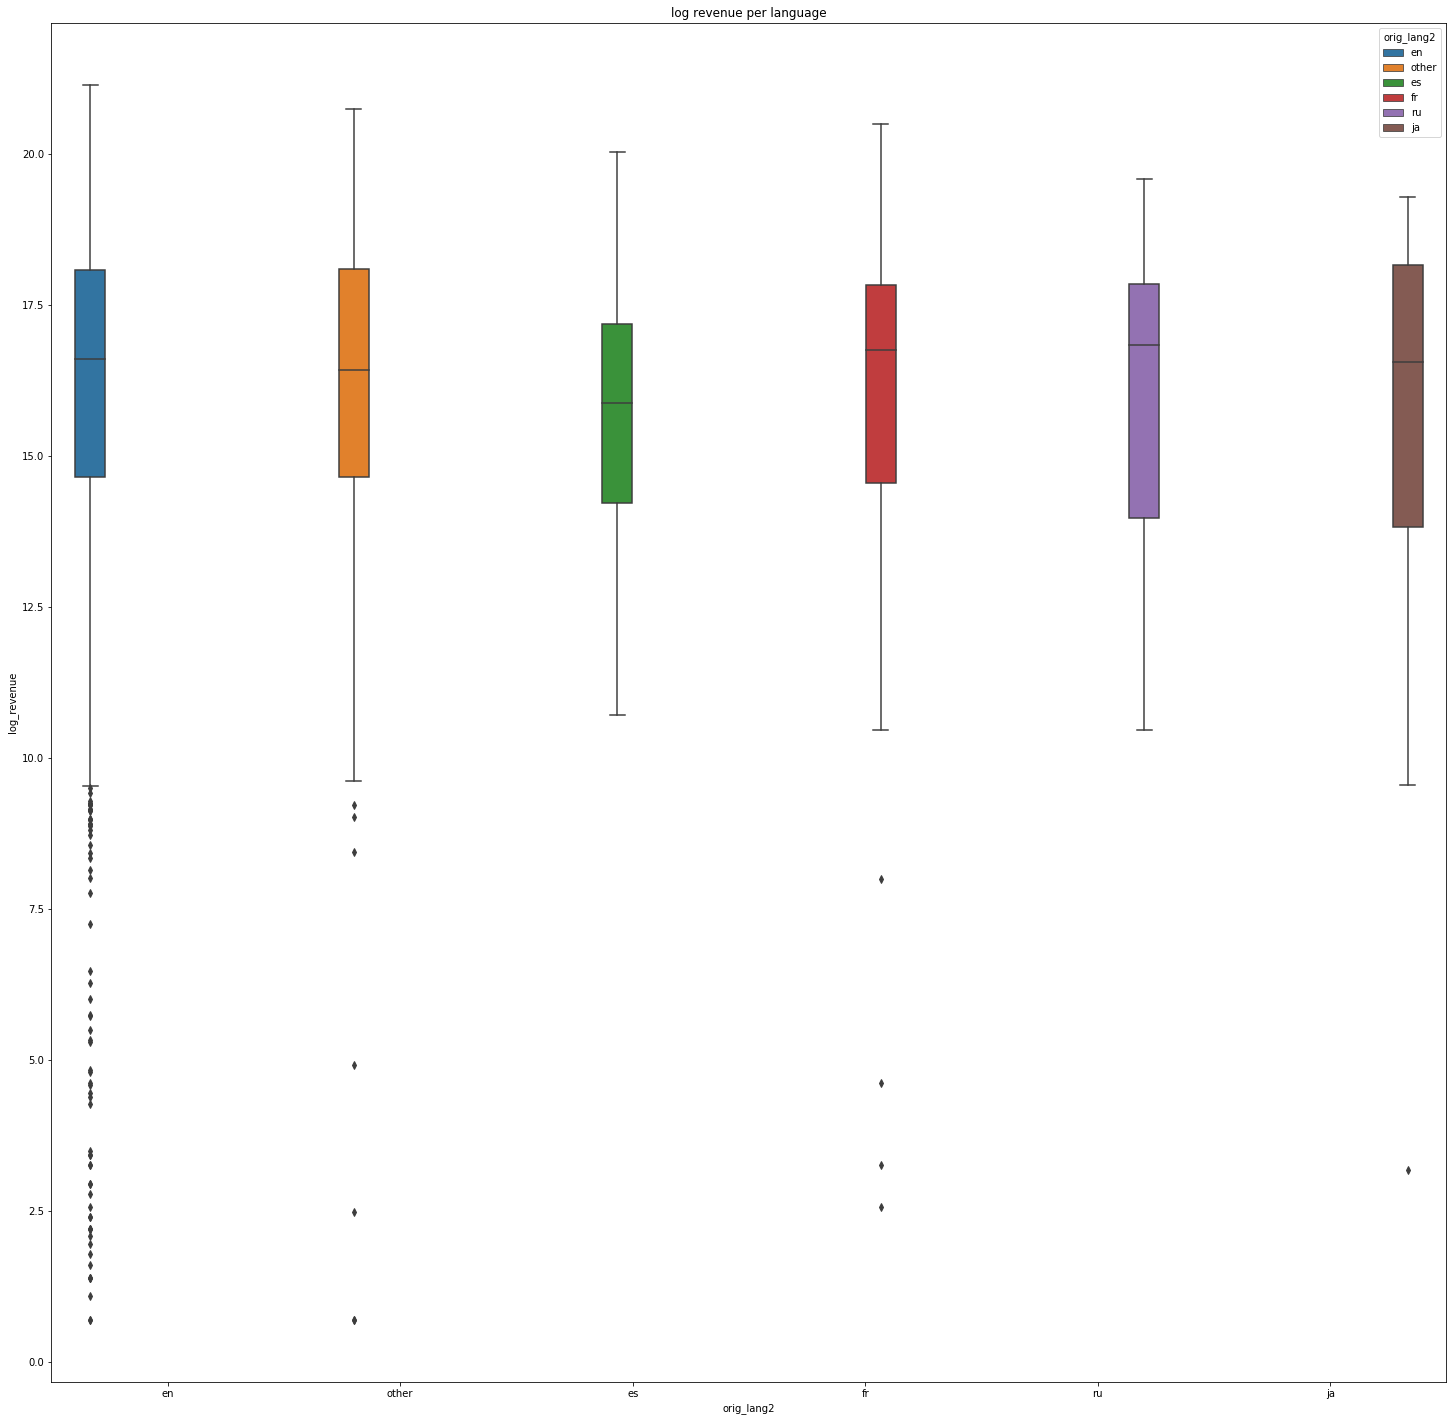

<Figure size 1080x1080 with 0 Axes>

In [97]:
# before delete outliers of revenue
plt.figure(figsize=(25, 25))
sns.boxplot(x='orig_lang2', y='log_revenue', hue="orig_lang2" , data=movies2.loc[movies2['orig_lang2'].isin(movies2['orig_lang2'].value_counts().head(6).index)]);
plt.title('log revenue per language');
plt.figure(figsize=(15,15))


<Figure size 1080x1080 with 0 Axes>

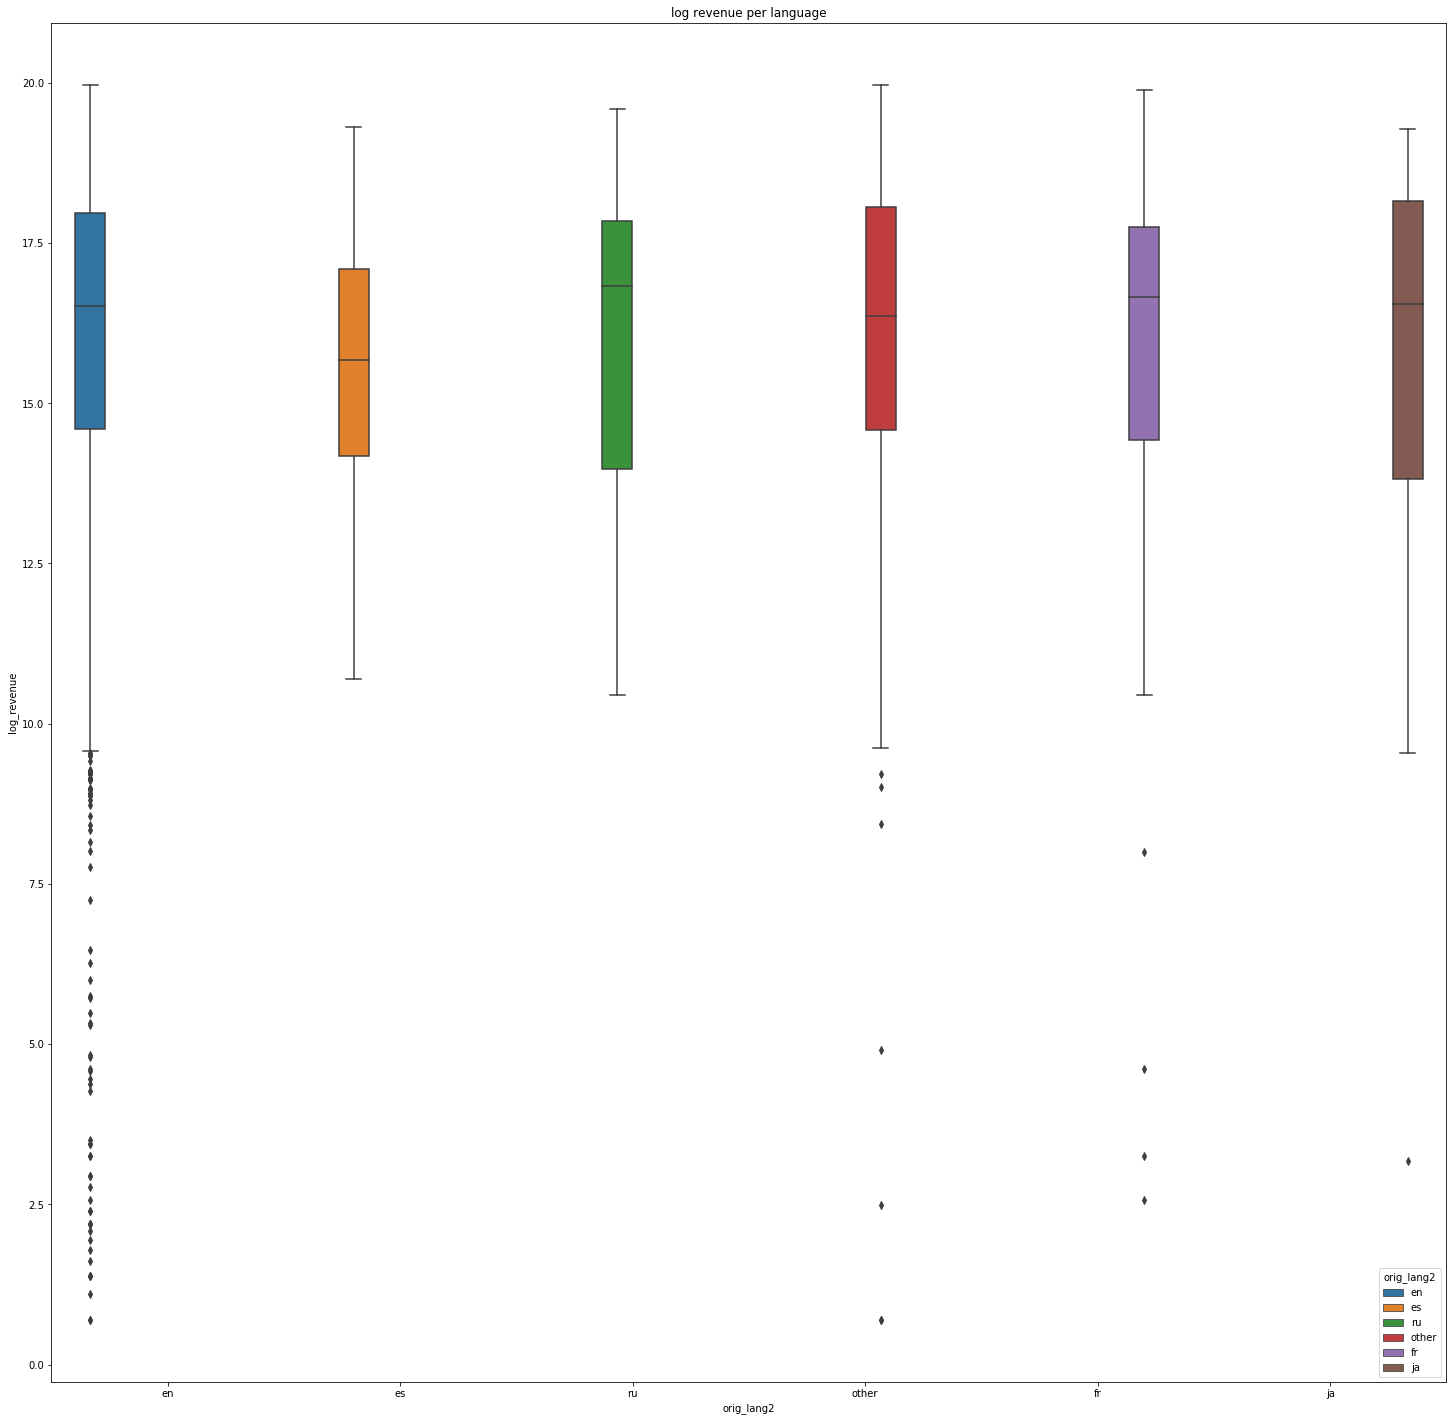

<Figure size 1080x1080 with 0 Axes>

In [98]:
# after remove the outliers of revenue
df_no_outliers_z

plt.figure(figsize=(25, 25))
sns.boxplot(x='orig_lang2', y='log_revenue', hue="orig_lang2" , data=df_no_outliers_z.loc[df_no_outliers_z['orig_lang2'].isin(df_no_outliers_z['orig_lang2'].value_counts().head(10).index)]);
plt.title('log revenue per language');
plt.figure(figsize=(15,15))


לא השפיע .....

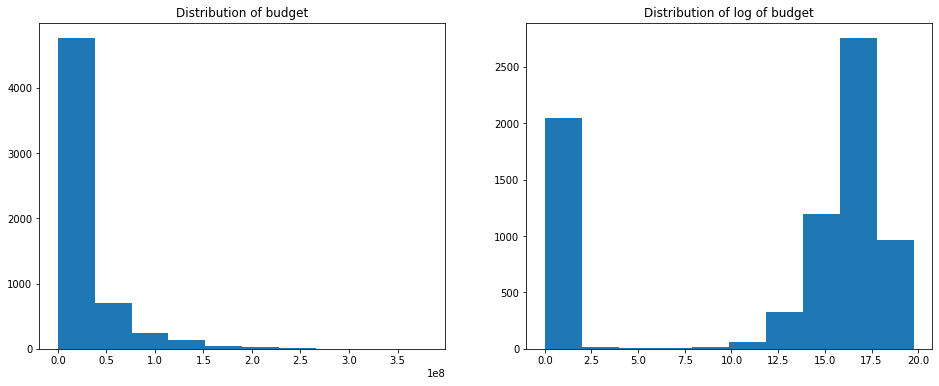

In [99]:
#  גם את העמודה budget   נרמלנו מאותה סיבה שעשינו זאת לעמודה  revenue
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(movies2['budget']);
plt.title('Distribution of budget');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(movies['budget']));
plt.title('Distribution of log of budget');

In [100]:
# log revenue is not normalized IQR
movies2['log_budget'] = np.log1p(movies['budget'])


In [101]:
df = movies2.copy()
df.log_budget.min()

0.0

In [102]:
Q1 = movies2.budget.quantile(0.25)
Q3 = movies2.budget.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit



(-45000000.0, 75000000.0)

In [103]:
#movies2[(movies2.budget<lower_limit)|(movies2.budget>upper_limit)]


In [104]:
# remove outliers of budget

df_no_outlier = movies2[(movies2.budget>lower_limit)&(movies2.budget<upper_limit)]
df_no_outlier


budget original_language  popularity release_date  release_year  \
movie_id                                                                      
2825             0                en    5.831622   1994-11-18        1994.0   
1400      50000000                en   16.075615   2016-05-15        2016.0   
692       35000000                en    5.370818   2003-09-05        2003.0   
2767      25000000                en    8.925600   2000-12-14        2000.0   
4332      35000000                en    7.821870   2006-09-09        2006.0   
...            ...               ...         ...          ...           ...   
904              0                en    1.833948   1984-03-16        1984.0   
3692             0                zh    0.690159   2006-10-13        2006.0   
662        5500000                da    4.711231   2012-09-04        2012.0   
5961             0                fr    6.579812   2013-04-02        2013.0   
4890      29500000                en   12.297305   1995-12-29        1995.0   

          release_month seasonality runtime_cat    status  keyword_cnt  ...  \
movie_id                                                                ...   
2825               11.0        fall         med  Released            8  ...   
1400                5.0      spring         med  Released           12  ...   
692                 9.0        fall         med  Released           15  ...   
2767               12.0      winter        long  Released            5  ...   
4332                9.0        fall         med  Released            6  ...   
...                 ...         ...         ...       ...          ...  ...   
904                 3.0      spring         med  Released            5  ...   
3692               10.0        fall         med  Released            8  ...   
662                 9.0        fall         med  Released            9  ...   
5961                4.0      spring         med  Released            2  ...   
4890               12.0      winter        long  Released           10  ...   

         sw_male_actor0  sw_male_actor1  sw_male_actor2 actor0_prev_revenue  \
movie_id                                                                      
2825                1.0             0.0             1.0         920100000.0   
1400                1.0             1.0             0.0         662845518.0   
692                 1.0             0.0             1.0         117487473.0   
2767                0.0             1.0             1.0          15000000.0   
4332                1.0             0.0             0.0         313542341.0   
...                 ...             ...             ...                 ...   
904                 1.0             0.0             1.0                 NaN   
3692                1.0             1.0             0.0                 NaN   
662                 1.0             0.0             0.0         431971116.0   
5961                0.0             1.0             0.0                 NaN   
4890                1.0             0.0             1.0         296000000.0   

         actor1_prev_revenue actor2_prev_revenue      revenue log_revenue  \
movie_id                                                                    
2825               9518342.0         176997168.0  100000000.0   18.420681   
1400             142851197.0                 NaN  346864462.0   19.664445   
692              117487473.0                 NaN  180622424.0   19.011919   
2767             113374103.0          41954997.0  136150434.0   18.729271   
4332              65497208.0         207515725.0          NaN         NaN   
...                      ...                 ...          ...         ...   
904               10400000.0          33697647.0  202026112.0   19.123908   
3692                     NaN                 NaN          NaN         NaN   
662                      NaN                 NaN   16633035.0   16.626901   
5961                     NaN                 NaN          NaN         NaN   
4890

MemoryError: Unable to allocate 5.55 GiB for an array with shape (745000000,) and data type float64

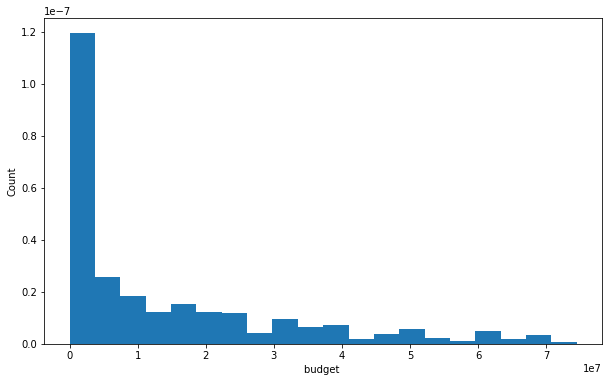

In [105]:
#  after remove the outliers
df_no_outlier

from scipy.stats import norm
import numpy as np
plt.hist(df_no_outlier.budget, bins=20, rwidth=1.0, density=True)
plt.xlabel('budget ')
plt.ylabel('Count')

rng = np.arange(df_no_outlier.budget.min(), df_no_outlier.budget.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df_no_outlier.budget.mean(),df_no_outlier.budget.std()))



MemoryError: Unable to allocate 28.3 GiB for an array with shape (3800000000,) and data type float64

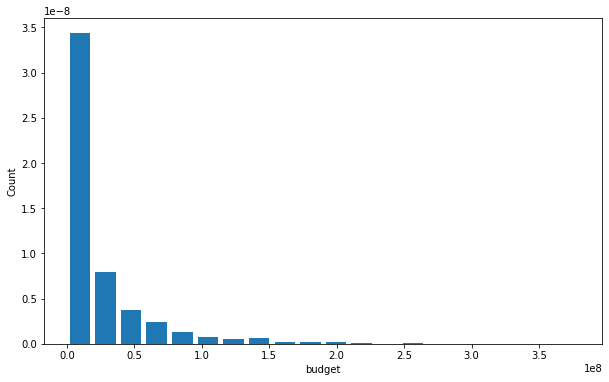

In [106]:
# before delete the outliers
from scipy.stats import norm
import numpy as np
plt.hist(movies2.budget, bins=20, rwidth=0.8, density=True)
plt.xlabel('budget')
plt.ylabel('Count')

rng = np.arange(movies2.budget.min(), movies2.budget.max(), 0.1)
plt.plot(rng, norm.pdf(rng,movies2.budget.mean(),movies2.budget.std()))
#  there is difference between the distribution  with and without the outliers

#  2

# 
2.	תייצרו גרף scatter עם המשתנים שבשאלה הקודמת ב-X ומשתנה המטרה ב-Y. האם ערכי קיצון במשתנה ה-X משפיעה על ההתנהגות של משתנה ה-Y? האם רואים שוני עם או בלי ערכי הקיצון?

In [108]:
import numpy  as np
budgetData = movies2["budget"]
num_budget_zeros = np.count_nonzero(budgetData==0.0)

num_budget_zeros
#  2023 -  about 25 percent missing budget inf.  (  zero  is like NA  in this case)
# formally - we can complete the missing data  of this warehouse becouse this a public data of the film studios
#  but of course I will not do that .....   so I will leave the data as it is


1610

#  2023 -  about 25 percent missing budget values.  zero  is like NA  in this case
 formally - we can complete the missing the whole data  of this DB becouse its a public data of the film studios
  but of course I will not do that .....   so I will leave the data as I got it.


In [109]:
y = movies.revenue                         


# 	3.2 נתונים חסרים
1.	עבור כל משתנה עם נתונים חסרים, תראו את ההתפלגות של משתנים אחרים עם או בלי חסרים. השתמשו במטריצת החסרים שייצרתם בחלק 2, שאלה 7 עבור החיווי של יש/אין חסר. עבור ההתפלגות, תשתמשו בהיסטוגרמה או בגרף density עם קטגוריה/צבע לפי החיווי.
2.	תייצרו טבלה של המשתנים שבהם יש חסרים ותתארו מהו מנגנון היצירה של החסרים (מבוסס על התוצאות של השאלה הקודמת).
3.	איזה טכניקה imputation מתאימה לכל משתנה? השתמשו בטכניקה  הנבחרת כדי להחליף את החסרים


#  MNAR  - Missing Not At Random - No Imputation
#  MCAR  - Missing Completely At Random
#  MAR     - Missing At Random

In [110]:
data = movies2.copy()

y = data.orig_lang2                           
list = ['orig_lang2']
x = data.drop(list,axis = 1 )
x.head()

budget original_language  popularity release_date  release_year  \
movie_id                                                                       
2825              0                en    5.831622   1994-11-18        1994.0   
1400       50000000                en   16.075615   2016-05-15        2016.0   
692        35000000                en    5.370818   2003-09-05        2003.0   
777       130000000                en    9.566135   2008-11-18        2008.0   
2767       25000000                en    8.925600   2000-12-14        2000.0   

          release_month seasonality runtime_cat    status  keyword_cnt  ...  \
movie_id                                                                ...   
2825               11.0        fall         med  Released            8  ...   
1400                5.0      spring         med  Released           12  ...   
692                 9.0        fall         med  Released           15  ...   
777                11.0        fall        long  Released           11  ...   
2767               12.0      winter        long  Released            5  ...   

         sw_female_actor2  sw_male_actor0  sw_male_actor1 sw_male_actor2  \
movie_id                                                                   
2825                  0.0             1.0             0.0            1.0   
1400                  1.0             1.0             1.0            0.0   
692                   0.0             1.0             0.0            1.0   
777                   1.0             0.0             1.0            0.0   
2767                  0.0             0.0             1.0            1.0   

         actor0_prev_revenue actor1_prev_revenue actor2_prev_revenue  \
movie_id                                                               
2825             920100000.0           9518342.0         176997168.0   
1400             662845518.0         142851197.0                 NaN   
692              117487473.0         117487473.0                 NaN   
777              384335608.0         459359555.0         144000000.0   
2767              15000000.0         113374103.0          41954997.0   

              revenue  log_revenue  log_budget  
movie_id                                        
2825      100000000.0    18.420681   16.705882  
1400      346864462.0    19.664445   18.643824  
692       180622424.0    19.011919   17.216708  
777       331957105.0    19.620516   18.826146  
2767      136150434.0    18.729271   16.811243  

[5 rows x 37 columns]

ValueError: could not convert string to float: 'en'

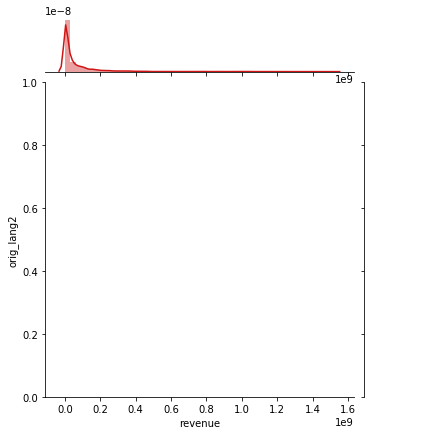

In [112]:
#  before  imputation
x = movies2.copy()
x["lang"]
sns.jointplot(x.loc[:,'revenue'],
              x.loc[:,'orig_lang2'],
              kind="regg",
              color="#ce1414");

#after imputation
x[['revenue']] = x[['revenue']].fillna(value=0)
sns.jointplot(x.loc[:,'revenue'],
              x.loc[:,'orig_lang2'],
              kind="regg",
              color="#ce1414");

(SELECT DISTINCT COUNT(1) AS Expr1
                               FROM            dbo.movie_actor_date_revenue AS movie_actor_date_revenue_10
                               WHERE        (release_date < a.release_date) AND (actor_id =
                                                             (SELECT        TOP (1) actor_id
                                                               FROM            dbo.movie_actor_date_revenue AS movie_actor_date_revenue_9
                                                               WHERE        (movie_id = a.movie_id) AND ([order] = 2)))) AS actor2_movies_cnt,
                             (SELECT DISTINCT COUNT(1) AS Expr1
                               FROM            dbo.movie_actor_date_revenue AS movie_actor_date_revenue_8
                               WHERE        (release_date BETWEEN DATEADD(YEAR, - 5, a.release_date) AND DATEADD(DAY, - 1, a.release_date)) AND (actor_id =
                                                             (SELECT        TOP (1) actor_id
                                                               FROM            dbo.movie_actor_date_revenue AS movie_actor_date_revenue_7
                                                               WHERE        (movie_id = a.movie_id) AND ([order] = 2)))) AS actor2_movies_5y_cnt,
                             (SELECT        MAX(CASE WHEN (e.gender = 1) THEN (1) ELSE (0) END) AS Expr1
                               FROM            dbo.movie_cast AS d LEFT OUTER JOIN
                                                         dbo.actors_dim AS e ON d.actor_id = e.actor_id
                               WHERE        (d.movie_id = a.movie_id) AND (d.[order] = 0)) AS sw_female_actor0,
                             (SELECT        MAX(CASE WHEN (e.gender = 1) THEN (1) ELSE (0) END) AS Expr1
                               FROM            dbo.movie_cast AS d LEFT OUTER JOIN
                                                         dbo.actors_dim AS e ON d.actor_id = e.actor_id
                               WHERE        (d.movie_id = a.movie_id) AND (d.[order] = 1)) AS sw_female_actor1,
                             (SELECT        MAX(CASE WHEN (e.gender = 1) THEN (1) ELSE (0) END) AS Expr1
                               FROM            dbo.movie_cast AS d LEFT OUTER JOIN
                                                         dbo.actors_dim AS e ON d.actor_id = e.actor_id
                               WHERE        (d.movie_id = a.movie_id) AND (d.[order] = 2)) AS sw_female_actor2,
                             (SELECT        MAX(CASE WHEN (e.gender = 2) THEN (1) ELSE (0) END) AS Expr1
                               FROM            dbo.movie_cast AS d LEFT OUTER JOIN
                                                         dbo.actors_dim AS e ON d.actor_id = e.actor_id
                               WHERE        (d.movie_id = a.movie_id) AND (d.[order] = 0)) AS sw_male_actor0,
                             (SELECT        MAX(CASE WHEN (e.gender = 2) THEN (1) ELSE (0) END) AS Expr1
                               FROM            dbo.movie_cast AS d LEFT OUTER JOIN
                                                         dbo.actors_dim AS e ON d.actor_id = e.actor_id
                               WHERE        (d.movie_id = a.movie_id) AND (d.[order] = 1)) AS sw_male_actor1,
                             (SELECT        MAX(CASE WHEN (e.gender = 2) THEN (1) ELSE (0) END) AS Expr1
                               FROM            dbo.movie_cast AS d LEFT OUTER JOIN
                                                         dbo.actors_dim AS e ON d.actor_id = e.actor_id
                               WHERE        (d.movie_id = a.movie_id) AND (d.[order] = 2)) AS sw_male_actor2,
                             (SELECT        MAX(revenue) AS Expr1
                               FROM            dbo.movie_actor_date_revenue AS movie_actor_date_revenue_6
                               WHERE        (release_date < a.release_date) AND (actor_id =
                                                             (SELECT        TOP (1) actor_id
                                                               FROM            dbo.movie_actor_date_revenue AS movie_actor_date_revenue_5
                                                               WHERE        (movie_id = a.movie_id) AND ([order] = 0))) AND (revenue IS NOT NULL)) AS actor0_prev_revenue,
                             (SELECT        MAX(revenue) AS Expr1
                               FROM            dbo.movie_actor_date_revenue AS movie_actor_date_revenue_4
                               WHERE        (release_date < a.release_date) AND (actor_id =
                                                             (SELECT        TOP (1) actor_id
                                                               FROM            dbo.movie_actor_date_revenue AS movie_actor_date_revenue_3
                                                               WHERE        (movie_id = a.movie_id) AND ([order] = 1))) AND (revenue IS NOT NULL)) AS actor1_prev_revenue,
                             (SELECT        MAX(revenue) AS Expr1
                               FROM            dbo.movie_actor_date_revenue AS movie_actor_date_revenue_2
                               WHERE        (release_date < a.release_date) AND (actor_id =
                                                             (SELECT        TOP (1) actor_id
                                                               FROM            dbo.movie_actor_date_revenue AS movie_actor_date_revenue_1
                                                               WHERE        (movie_id = a.movie_id) AND ([order] = 2))) AND (revenue IS NOT NULL)) AS actor2_prev_revenue

#
לכן מאחר ובעמודה    revenue  
יש הרבה נתונים חסרים
גם בעמודות המחושבות המסתמכות על ערך זה יהיו נתונים חסרים וזה בסדר

גם בטבלה המתארת את הצוות של הסרט חסרים נתונים וזה משפיע על העמודות של ה   actors  למיניהן.

# release_date has one missing vlue.
we can complete it by imputing the mean value
of to find out when this film was released. which is the right approach.
but will imput the avg. value  .



# בעמודה   release date  חסר נתון בודד אותו ניתן להשלים.
באופן ידני .
הוספת נתון יחיד לא תשפיע ....
ןכמובן ניתן ואפשר למצוא את תאריך היציאה של הסרט לאקרנים .
במסמכים של האולפנים ..
ברשתות המפיצות הסרטים ...

#  PART 4
run part 2

In [114]:
print(movies2.info(), "\n")
print(movies2.describe(), "\n")
for col in movies2:
    print(col + ' ' + str(movies2[col].nunique()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5918 entries, 2825 to 4890
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   budget                5918 non-null   int64   
 1   original_language     5918 non-null   category
 2   popularity            5918 non-null   float64 
 3   release_date          5917 non-null   object  
 4   release_year          5917 non-null   float64 
 5   release_month         5917 non-null   float64 
 6   seasonality           5918 non-null   category
 7   runtime_cat           5918 non-null   category
 8   status                5916 non-null   category
 9   keyword_cnt           5918 non-null   int64   
 10  sw_collection         5918 non-null   category
 11  producers_cnt         5575 non-null   float64 
 12  countries_cnt         5918 non-null   int64   
 13  lang_US               5918 non-null   category
 14  lang_FR               5918 non-null   category
 15  l

In [119]:
# import matplotlib.pyplot as plt



# fig = plt.figure(figsize=(18, 9))

# idx = 0

# for column in movies2:

#     if movies2[column].dtype != np.int64 and movies2[column].dtype != np.float64:
#         idx += 1
#         ca = movies2.plot.scatter(x = column, y = 'orig_lang2', ax = fig.add_subplot(2,3,idx))

# #    plt.plot(df.iloc[:,df[column]].values, sm.OLS(df.iloc[:,df['log_prices'].values,sm.add_constant(df.iloc[:,df[column]].values)).fit().fittedvalues,'r-')


#                                         THE  END